In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

0 - classical
1 - country 
2 - edm 
3 - happy
4 - hiphop
5 - jazz 
6 - newhits
7 - oldhits
8 - party
9 - rock
10 - romantic
11 - sad 
12 - trance
13 - workout

In [221]:
from sklearn import svm
def model(x_train, y_train, x_val, y_val):

    print("length of validation set", len(y_val))
    total_correct_predictions = 0
    total_predictions = 0
    df = pd.DataFrame(np.array(x_train))
   
    df.columns = ['popularity', 'acousticness', 'energy', 'livenes', 'tempo', 'speechiness', 'instrumentalness', 'time_signature', 'danceability', 'key', 'duration_ms', 'loudness', 'valence' , 'mode']
    df['playlist'] = y_train
#     print(df['playlist'].describe())
    df['playlist'] = df['playlist'].map({0: 'classical', 1: 'country', 2: 'edm' , 3: 'happy', 4: 'hiphop', 
                                       5: 'jazz', 6: 'newhits', 7: 'oldhits', 8:'party', 9:'rock', 10:'romantic',
                                        11: 'sad', 12:'trance', 13:'workout'})

#     print(df['playlist'].describe())
    tmp_X = df.drop(columns=['playlist'])
    tmp_y = df.iloc[:,14:15]
    # building C1
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    #print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C1: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y = np.ravel(tmp_y['playlist_codes'])
    #print(list(y))
    new_labels = []
    for i in y:
        if i == 12:
            new_labels.append(1)
        else:
            new_labels.append(0)
    y = np.asarray(new_labels)
    #print(list(y))
    total_correct_predictions = 0
    #build the SVM classifier for C1
    correct_pred = 0
    #clf_C1 = svm.SVC(C=1)
    #clf_C1 = svm.SVC(gamma='auto', C = 50)
    clf_C1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
    clf_C1.fit(X, y)
    y_pred = clf_C1.predict(x_val)
    
    correct_pred_trance = 0
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 1 and y_val[i] == 12):
            correct_pred_trance += 1
            correct_pred += 1
        elif(y_pred[i] == 0 and y_val[i] != 12):
            correct_pred += 1
    total_trance = list(y_val).count(12)
    total_correct_predictions += correct_pred_trance
    pred = len(y_pred)
    total_predictions += total_trance
    accuracy_C1 = (correct_pred/pred)
    O_acc_1 = (total_correct_predictions/total_predictions)
    print('C1')
    print("no of correct predictions: ", correct_pred)
    print("Total no of predictions: ", pred)
    print("accuracy of C1: ", (correct_pred/pred)*100, "%")
    print("Number of trance songs predicted correctly: ", correct_pred_trance)
    print("Total number of trance songs in validation set: ", total_trance)
    print("precision of trance: ", (correct_pred_trance/total_trance)*100, "%")
    print("Total number of correct predictions so far: ", total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    print("overall accuracy so far: ", (total_correct_predictions/total_predictions)*100, "%")
    
    print('-------------------------------------------------------------------------------------')
    
    
    
    #Classifier C2
    df_C2 = df[df.playlist != 'trance']
    tmp_X = df_C2.drop(columns=['playlist'])
    tmp_y = df_C2.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C2: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    new_labels = []
    #jazz and classical get label = 1
    for i in y:
        if i == 0 or i == 5:
            new_labels.append(1)
        else:
            new_labels.append(0)
    y = np.asarray(new_labels)
    print(y)
    x_val_c3 = []
    y_val_c3 = []
    x_val_c4 = []
    y_val_c4 = []
    #buliding SVM for C2
    correct_pred = 0
    #clf_C2 = svm.SVC(C=1)
    #clf_C2 = svm.SVC(gamma='auto', C = 10)
    parameters = {'n_estimators':[50,100, 150, 200], 'max_depth':[2,4,6,8,10]}
    gb_C2 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C2 = GridSearchCV(gb_C2, parameters, cv=5)
    clf_C2.fit(X, y)
    y_pred = clf_C2.predict(x_val)
    total_C2_songs = 0
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 1):
            x_val_c3.append(x_val[i])
            y_val_c3.append(y_val[i])
        else:
            x_val_c4.append(x_val[i])
            y_val_c4.append(y_val[i])
        if(y_val[i] != 12):
            total_C2_songs += 1
        if(y_pred[i] == 1 and (y_val[i] == 5 or y_val[i] == 0)):
            correct_pred += 1
        elif(y_pred[i] == 0 and (y_val[i] != 5 and y_val[i] != 0 and y_val[i] != 12)):
            correct_pred += 1
    #total_correct_prediction += correct_prediction
    accuracy_C2 = (correct_pred/total_C2_songs)
    print('C2')
    print("no of correct predictions: ", correct_pred)
    print("Total no of C2 songs in the dataset: ", total_C2_songs)
    print("accuracy of C2: ", (correct_pred/total_C2_songs)*100, "%")
    x_val_c3 = np.asarray(x_val_c3)
    y_val_c3 = np.asarray(y_val_c3)
    x_val_c4 = np.asarray(x_val_c4)
    y_val_c4 = np.asarray(y_val_c4)
    print("len of x_val_c3: ", len(x_val_c3))
    print("len of y_val_c3: ", len(y_val_c3))
    print("len of x_val_c4: ", len(x_val_c4))
    print("len of y_val_c4: ", len(y_val_c4))
    
    print('-------------------------------------------------------------------------------------')
    
    
    
    
    
    #C3 - distinguish between jazz and classical
    print("Total number of correct predictions so far: ",total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    df_C3 = df[df['playlist'].isin(['classical', 'jazz'])]
    tmp_X = df_C3.drop(columns=['playlist'])
    tmp_y = df_C3.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C3: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    #print(y)
    
    #building RF for C3
    correct_pred = 0
#     clf_C3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
#             max_depth=11, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=14, min_samples_split=3,
#             min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)
    pred_jazz = 0
    pred_classical = 0
    total_jazz = list(y_val).count(5)
    total_classical = list(y_val).count(0)
    #clf_C3 = svm.SVC(C=1)
    parameters = {'n_estimators':[50,100, 150, 200], 'max_depth':[2,4,6,8,10]}
    gb_C3 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C3 = GridSearchCV(gb_C3, parameters, cv=5)
    clf_C3.fit(X, y)
    y_pred = clf_C3.predict(x_val_c3)
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 0 and y_val_c3[i] == 0):
            correct_pred += 1
            pred_classical += 1
        elif(y_pred[i] == 1 and y_val_c3[i] == 5):
            correct_pred += 1
            pred_jazz += 1
    total_correct_predictions += correct_pred
    total_C3_songs = len(y_val_c3)
    total_predictions = (total_jazz + total_classical + total_trance)
    accuracy_C3 = (correct_pred/total_C3_songs)
    O_acc_2 = (total_correct_predictions/total_predictions)
    print('C3')
    print("no of correct predictions: ", correct_pred)
    print("Total no of C3 songs in the dataset: ", total_C3_songs)
    print("accuracy of C3: ", (correct_pred/total_C3_songs)*100, "%")
    print("precision of jazz: ", (pred_jazz/total_jazz)*100, "%")
    print("precision of classical: ", (pred_classical/total_classical)*100, "%")
    print("Total number of correct predictions so far: ",total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    print("overall accuracy so far: ", (total_correct_predictions/total_predictions)*100, "%")
    
    
    print('-------------------------------------------------------------------------------------')
    
    
    
    #Classifier C4
    df_C4 = df[df['playlist'].isin(['edm', 'workout', 'oldhits', 'hiphop', 'newhits', 'country', 'happy', 'party', 'rock', 'romantic', 'sad']) ]
    #print(df_C4)
    tmp_X = df_C4.drop(columns=['playlist'])
    tmp_y = df_C4.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C4: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    #EDM, workout, oldhits, hiphop, newhits - class 1 -- 0
    #country, happy, party, rock, romantic, sad - class 2 -- 1
    new_labels = []
    for i in y:
        if i == 1 or i==10 or i==5 or i==4 or i==3:
            new_labels.append(0)
        else:
            new_labels.append(1)
    y = np.asarray(new_labels)
    #building SVM for C4 
    x_val_c5 = []
    y_val_c5 = []
    x_val_c6 = []
    y_val_c6 = []
    correct_pred = 0
    

#     clf_C4 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
#             max_features='sqrt', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=8, min_samples_split=8,
#             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#             splitter='best')
    #clf_C4 = svm.SVC(C=1)
    parameters = {'n_estimators':[50,100, 150, 200], 'max_depth':[2,4,6,8,10]}
    gb_C4 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C4 = GridSearchCV(gb_C4, parameters, cv=5)
#     clf_C4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0)
    #clf_C4 = LogisticRegression(random_state=0, solver='liblinear', C = 0.1).fit(X, y)
    
    clf_C4.fit(X, y)
    y_pred = clf_C4.predict(x_val_c4)
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 0):
            x_val_c5.append(x_val_c4[i])
            y_val_c5.append(y_val_c4[i])
        else:
            x_val_c6.append(x_val_c4[i])
            y_val_c6.append(y_val_c4[i])
        if(y_pred[i] == 0 and ((y_val_c4[i] == 2) or (y_val_c4[i] == 13) or (y_val_c4[i] == 7) or (y_val_c4[i] == 4) or (y_val_c4[i] == 6))):
            correct_pred += 1
        elif(y_pred[i] == 1 and ((y_val_c4[i] == 1) or (y_val_c4[i] == 3) or (y_val_c4[i] == 8) or (y_val_c4[i] == 9) or (y_val_c4[i] == 10) or (y_val_c4[i] == 11))):
            correct_pred += 1
    total_C4_songs = len(y_val_c4)
    accuracy_C4 = (correct_pred/total_C4_songs)
    print('C4')
    print("no of correct predictions: ", correct_pred)
    print("Total no of C4 songs in the dataset: ", total_C4_songs)
    print("accuracy of C4: ", (correct_pred/total_C4_songs)*100, "%")
    x_val_c5 = np.asarray(x_val_c5)
    y_val_c5 = np.asarray(y_val_c5)
    x_val_c6 = np.asarray(x_val_c6)
    y_val_c6 = np.asarray(y_val_c6)
    print("len of x_val_c5: ", len(x_val_c5))
    print("len of y_val_c5: ", len(y_val_c5))
    print("len of x_val_c6: ", len(x_val_c6))
    print("len of y_val_c6: ", len(y_val_c6))
    
    
    
    print('-------------------------------------------------------------------------------------')
    
    
    #C5 
    df_c5 = df[df['playlist'].isin(['edm', 'workout', 'oldhits', 'hiphop', 'newhits'])]
    #print(df_C4)
    tmp_X = df_c5.drop(columns=['playlist'])
    tmp_y = df_c5.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C5: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    new_labels = []
    #edm, workout -- class 1 -- 0
    #oldhits, newhits, hiphop -- class 2 -- 1
    for i in y:
        if i == 0 or i== 4:
            new_labels.append(0)
        else:
            new_labels.append(1)
    y = np.asarray(new_labels)
    print(y)
    #building SVM for C5
    x_val_c7 = []
    y_val_c7 = []
    x_val_c8 = []
    y_val_c8 = []
    correct_pred = 0
#     #clf_C5 = svm.SVC(C=0.1)
#     param_grid = {'max_depth': np.arange(2, 10), 'min_samples_split': np.arange(2, 15), 'min_samples_leaf': np.arange(1, 15),
#              'max_features':["auto", "sqrt", "log2", None], 'class_weight':['balanced', None], 'criterion': ['entropy', 'gini']}

#     # prepare a range of alpha values to test

#     # create and fit a ridge regression model, testing each alpha
#     model = DecisionTreeClassifier()
#     grid = GridSearchCV(estimator=model, param_grid=param_grid)
#     grid.fit(X, y)
#     print(grid)
#     # summarize the results of the grid search
#     print(grid.best_score_)
#     print(grid.best_estimator_)
    
    
#     clf_C5 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
#             max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=11, min_samples_split=4,
#             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#             splitter='best')
    #clf_C5 = svm.SVC(C=1)
    #clf_C5 = LogisticRegression(random_state=0, solver='liblinear', C = 1).fit(X, y)
    parameters = {'n_estimators':[50,100, 150, 200], 'max_depth':[2,4,6,8,10]}
    gb_C5 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C5 = GridSearchCV(gb_C5, parameters, cv=5)
#     clf_C5 = GradientBoostingClassifier(n_estimators=150, learning_rate=1.0, max_depth=4, random_state=0)
    clf_C5.fit(X, y)
    y_pred = clf_C5.predict(x_val_c5)
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 0):
            x_val_c7.append(x_val_c5[i])
            y_val_c7.append(y_val_c5[i])
        else:
            x_val_c8.append(x_val_c5[i])
            y_val_c8.append(y_val_c5[i])
        if(y_pred[i] == 0 and ((y_val_c5[i] == 2) or (y_val_c5[i] == 13))):
            correct_pred += 1
        elif(y_pred[i] == 1 and ((y_val_c5[i] == 7) or (y_val_c5[i] == 4) or (y_val_c5[i] == 6))):
            correct_pred += 1
    total_C5_songs = len(y_val_c5)
    print('C5')
    accuracy_C5 = (correct_pred/total_C5_songs)
    print("no of correct predictions: ", correct_pred)
    print("Total no of C5 songs in the dataset: ", total_C5_songs)
    print("accuracy of C5: ", (correct_pred/total_C5_songs)*100, "%")
    x_val_c7 = np.asarray(x_val_c7)
    y_val_c7 = np.asarray(y_val_c7)
    x_val_c8 = np.asarray(x_val_c8)
    y_val_c8 = np.asarray(y_val_c8)
    print("len of x_val_c7: ", len(x_val_c7))
    print("len of y_val_c7: ", len(y_val_c7))
    print("len of x_val_c8: ", len(x_val_c8))
    print("len of y_val_c8: ", len(y_val_c8))
    
    
    
    print('-------------------------------------------------------------------------------------')
    
    
    #C7 - distinguish between EDM and workout
    print("Total number of correct predictions so far: ",total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    df_C7 = df[df['playlist'].isin(['edm', 'workout']) ]
    tmp_X = df_C7.drop(columns=['playlist'])
    tmp_y = df_C7.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C7: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    #print(y)
    
    #building SVM for C7
    
    correct_pred = 0
    total_edm = list(y_val).count(2)
    total_workout = list(y_val).count(13)
    total_predictions = total_trance + total_jazz + total_classical + total_edm + total_workout
    correct_edm = 0
    correct_workout = 0
    parameters = {'n_estimators':[50,100, 150, 200], 'max_depth':[2,4,6,8,10]}
    gb_C7 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C7 = GridSearchCV(gb_C7, parameters, cv=5)
#     clf_C7 = svm.SVC(C=1)
#     clf_C7 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0)
    clf_C7.fit(X, y)
    y_pred = clf_C7.predict(x_val_c7)
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 0 and y_val_c7[i] == 2):
            correct_pred += 1
            correct_edm += 1
        elif(y_pred[i] == 1 and y_val_c7[i] == 13):
            correct_pred += 1
            correct_workout += 1
    total_correct_predictions += correct_pred
    total_C7_songs = len(y_pred)
    accuracy_C7 = (correct_pred/total_C7_songs)
    O_acc_3 = (total_correct_predictions/total_predictions)
    print('C7')
    print("no of correct predictions: ", correct_pred)
    print("Total no of C7 songs: ", total_C7_songs)
    print("accuracy of C7: ", (correct_pred/total_C7_songs)*100, "%")
    print("precision of EDM: ", (correct_edm/total_edm)*100, "%")
    print("precision of workout: ", (correct_workout/total_workout)*100, "%")
    print("Total number of correct predictions so far: ", total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    print("overall accuracy so far: ", (total_correct_predictions/total_predictions)*100, "%")
    
    
    
    print('-------------------------------------------------------------------------------------')
    
    #C8
    print("Total number of correct predictions so far: ", total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    df_C8 = df[df['playlist'].isin(['hiphop', 'newhits', 'oldhits']) ]
    #print(df_C4)
    tmp_X = df_C8.drop(columns=['playlist'])
    tmp_y = df_C8.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C8: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    #oldhits - class 1 - 0
    #Hiphop, newsongs - class 2 - 1
    new_labels = []
    for i in y:
        if i == 0 or i== 4:
            new_labels.append(0)
        else:
            new_labels.append(1)
    y = np.asarray(new_labels)
    #print(y)
    #building SVM for C8
    x_val_c9 = []
    y_val_c9 = []
    
    correct_prediction = 0
    parameters = {'n_estimators':[50,100, 150, 200], 'max_depth':[2,4,6,8,10]}
    gb_C8 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C8 = GridSearchCV(gb_C8, parameters, cv=5)
#     clf_C8 = svm.SVC(C=1)
#     clf_C8 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
    clf_C8.fit(X, y)
    y_pred = clf_C8.predict(x_val_c8)
    total_oldhits = list(y_val).count(7)
    corrrect_oldhits = 0
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 1):
            x_val_c9.append(x_val_c8[i])
            y_val_c9.append(y_val_c8[i])
        if(y_pred[i] == 0 and y_val_c8[i] == 7):
            correct_prediction += 1
            corrrect_oldhits += 1
        elif(y_pred[i] == 1 and (y_val_c8[i] == 6) or (y_val_c8[i] == 4)):
            correct_prediction += 1
    total_C8_songs = len(y_val_c8)
    total_correct_predictions += corrrect_oldhits
    total_predictions += total_oldhits
    accuracy_C8 = (correct_prediction/total_C8_songs)
    O_acc_4 = (total_correct_predictions/total_predictions)
    print('C8')
    print("no of correct predictions: ", correct_prediction)
    print("Total no of C8 songs in the dataset: ", total_C8_songs)
    print("accuracy of C8: ", (correct_prediction/total_C8_songs)*100, "%")
    print("no of old hits predicted correctly: ", corrrect_oldhits)
    print("Total no of old hits songs in the dataset: ", total_oldhits)
    print("precision of oldhits: ", (corrrect_oldhits/total_oldhits)*100, "%")
    print("Total number of correct predictions so far: ", total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    print("overall accuracy so far: ", (total_correct_predictions/total_predictions)*100, "%")
    x_val_c9 = np.asarray(x_val_c9)
    y_val_c9 = np.asarray(y_val_c9)
    print("len of x_val_c5: ", len(x_val_c9))
    print("len of y_val_c5: ", len(y_val_c9))
    
    
    
    print('-------------------------------------------------------------------------------------')
    
    
    
    
    
    #C9 - distinguish between hiphop and newhits
    print("Total number of correct predictions so far: ",total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    df_C9 = df[df['playlist'].isin(['hiphop', 'newhits']) ]
    tmp_X = df_C9.drop(columns=['playlist'])
    tmp_y = df_C9.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C9: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    #print(y)
    
    #building SVM for C7
    correct_pred = 0
    correct_hiphop = 0
    correct_newhits = 0
    total_hiphop = list(y_val).count(4)
    total_newhits = list(y_val).count(6)
    parameters = {'n_estimators':[50,100, 150, 200], 'max_depth':[2,4,6,8,10,12,13]}
    gb_C9 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C9 = GridSearchCV(gb_C9, parameters, cv=5)
    #clf_C9 = svm.SVC(C=1)
#     clf_C9 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
    clf_C9.fit(X, y)
    y_pred = clf_C9.predict(x_val_c9)
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 0 and y_val_c9[i] == 4):
            correct_pred += 1
            correct_hiphop += 1
        elif(y_pred[i] == 1 and y_val_c9[i] == 6):
            correct_pred += 1
            correct_newhits += 1
    total_correct_predictions += correct_pred
    total_C9_songs = len(y_pred)
    total_predictions += (total_hiphop + total_newhits)
    print('C9')
    accuracy_C9 = (correct_pred/total_C9_songs)
    print("no of correct predictions: ", correct_pred)
    print("Total no of C9 songs: ", total_C9_songs)
    print("accuracy of C9: ", (correct_pred/total_C9_songs)*100, "%")
    print("precision of newhits: ", (correct_newhits/total_newhits)*100, "%")
    print("precision of hiphop: ", (correct_hiphop/total_hiphop)*100, "%")
    print("Total number of correct predictions so far: ",total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    print("overall accuracy so far: ", (total_correct_predictions/total_predictions)*100, "%")
    
    
    print('-------------------------------------------------------------------------------------')
    #C6
#     party, country, happy - class 1 -- 0
#     rock, romantic, sad - class 2 -- 1
    df_c6 = df[df['playlist'].isin(['country', 'happy', 'party', 'rock', 'romantic', 'sad'])]
    #print(df_C4)
    tmp_X = df_c6.drop(columns=['playlist'])
    tmp_y = df_c6.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C6: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    new_labels = []
    #edm, workout -- class 1 -- 0
    #oldhits, newhits, hiphop -- class 2 -- 1
    new_labels = []
    for i in y:
        if i == 2 or i==0 or i==1:
            new_labels.append(0)
        else:
            new_labels.append(1)
    y = np.asarray(new_labels)
#     print(y)
#     print(y)
    #building SVM for C5
    x_val_c10 = []
    y_val_c10 = []
    x_val_c11 = []
    y_val_c11 = []
    correct_prediction = 0
#     clf_C6 = svm.SVC(C=1)
    parameters = {'n_estimators':[50,100, 150, 200], 'max_depth':[2,4,6,8,10]}
    gb_C6 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C6 = GridSearchCV(gb_C6, parameters, cv=5)
    clf_C6.fit(X, y)
    y_pred = clf_C6.predict(x_val_c6)
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 0):
            x_val_c10.append(x_val_c6[i])
            y_val_c10.append(y_val_c6[i])
        else:
            x_val_c11.append(x_val_c6[i])
            y_val_c11.append(y_val_c6[i])
        if(y_pred[i] == 0 and ((y_val_c6[i] == 8) or (y_val_c6[i] == 1)  or (y_val_c6[i] == 3))):
            correct_prediction += 1
        elif(y_pred[i] == 1 and ((y_val_c6[i] == 9) or  (y_val_c6[i] == 10) or (y_val_c6[i] == 11))):
            correct_prediction += 1
    total_C6_songs = len(y_val_c6)
    print('C6')
    accuracy_C6 = (correct_prediction/total_C6_songs)
    print("no of correct predictions: ", correct_prediction)
    print("Total no of C6 songs in the dataset: ", total_C6_songs)
    print("accuracy of C6: ", (correct_prediction/total_C6_songs)*100, "%")
    x_val_c10 = np.asarray(x_val_c10)
    y_val_c10 = np.asarray(y_val_c10)
    x_val_c11 = np.asarray(x_val_c11)
    y_val_c11 = np.asarray(y_val_c11)
    print("len of x_val_c10: ", len(x_val_c10))
    print("len of y_val_c10: ", len(y_val_c10))
    print("len of x_val_c11: ", len(x_val_c11))
    print("len of y_val_c11: ", len(y_val_c11))
    
    
    print('-------------------------------------------------------------------------------------')
    
    
    
    
    
    #C10 
    #party - class 1 - 0
    #country, happy - class 2 - 1
    df_C10 = df[df['playlist'].isin(['country', 'happy', 'party'])]
    tmp_X = df_C10.drop(columns=['playlist'])
    tmp_y = df_C10.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C2: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    new_labels = []
    for i in y:
        if i == 2:
            new_labels.append(0)
        else:
            new_labels.append(1)
    y = np.asarray(new_labels)
    
    #building SVM for C10
    x_val_c12 = []
    y_val_c12 = []
    correct_prediction = 0
#     clf_C10 = svm.SVC(C=1)
#     clf_C10 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
    parameters = {'n_estimators':[50,100, 150, 200], 'max_depth':[2,4,6,8,10]}
    gb_C10 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C10 = GridSearchCV(gb_C10, parameters, cv=5)
    clf_C10.fit(X, y)
    y_pred = clf_C10.predict(x_val_c10)
    total_party = list(y_val).count(8)
    correct_party = 0
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 1):
            x_val_c12.append(x_val_c10[i])
            y_val_c12.append(y_val_c10[i])
        if(y_pred[i] == 0 and y_val_c10[i] == 8):
            correct_prediction += 1
            correct_party += 1
        elif(y_pred[i] == 1 and (y_val_c10[i] == 3) or (y_val_c10[i] == 1)):
            correct_prediction += 1
    total_C10_songs = len(y_val_c10)
    total_correct_predictions += correct_party
    total_predictions += total_party
    accuracy_C10 = (correct_prediction/total_C10_songs)
    print('C10')
    print("no of correct predictions: ", correct_prediction)
    print("Total no of C10 songs in the dataset: ", total_C10_songs)
    print("accuracy of C10: ", (correct_prediction/total_C10_songs)*100, "%")
    print("no of party songs predicted correctly: ", correct_party)
    print("Total party songs in the dataset: ", total_party)
    print("precision of party songs: ", (correct_party/total_party)*100, "%")
    print("Total number of correct predictions so far: ",total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    print("overall accuracy so far: ", (total_correct_predictions/total_predictions)*100, "%")
    x_val_c12 = np.asarray(x_val_c12)
    y_val_c12 = np.asarray(y_val_c12)
    print("len of x_val_c5: ", len(x_val_c12))
    print("len of y_val_c5: ", len(y_val_c12))
    
    
    print('-------------------------------------------------------------------------------------')
    
    
    #C12 - distinguish between country and happy songs
    print("Total number of correct predictions so far: ",total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    df_C12 = df[df['playlist'].isin(['country', 'happy'])] 
    tmp_X = df_C12.drop(columns=['playlist'])
    tmp_y = df_C12.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C12: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    #print(y)
    
    #building SVM for C12
    correct_prediction = 0
    correct_country = 0
    total_country = list(y_val).count(1)
    correct_happy = 0
    total_happy = list(y_val).count(3)
    #clf_C12 = svm.SVC(C=1)
#     clf_C12 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
#     clf_C12.fit(X, y)
    parameters = {'n_estimators':[50,100, 150, 200], 'max_depth':[2,4,6,8,10]}
    gb_C12 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C12 = GridSearchCV(gb_C12, parameters, cv=5)
    clf_C12.fit(X, y)
    y_pred = clf_C12.predict(x_val_c12)
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 0 and y_val_c12[i] == 1):
            correct_prediction += 1
            correct_country += 1
        elif(y_pred[i] == 1 and y_val_c12[i] == 3):
            correct_prediction += 1
            correct_happy += 1
    total_correct_predictions += correct_prediction
    total_C12_songs = len(y_val_c12)
    total_predictions += (total_happy + total_country)
    accuracy_C12 = (correct_prediction/total_C12_songs)
    print('C12')
    print("no of correct predictions: ", correct_prediction)
    print("Total no of C12 songs in the dataset: ", total_C12_songs)
    print("accuracy of C12: ", (correct_prediction/total_C12_songs)*100, "%")
#     print("precision of country songs: ", (correct_country/total_country)*100, "%")
#     print("precision of happy songs: ", (correct_happy/total_happy)*100, "%")
    
    print("Total number of correct predictions so far: ", total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    print("overall accuracy so far: ", (total_correct_predictions/total_predictions)*100, "%")
    
    
    print('-------------------------------------------------------------------------------------')
    
    
    #C11
    #rock -- class 1 -- 0 
    #omantic, sad - class 2 -- 1
    df_C11 = df[df['playlist'].isin(['rock', 'romantic', 'sad']) ]
    tmp_X = df_C11.drop(columns=['playlist'])
    tmp_y = df_C11.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C11: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    new_labels = []
    for i in y:
        if i == 0:
            new_labels.append(0)
        else:
            new_labels.append(1)
    y = np.asarray(new_labels)
    
    #building SVM for C11
    x_val_c13 = []
    y_val_c13 = []
    correct_prediction = 0
    correct_rock = 0
    total_rock = list(y_val).count(9)
    #clf_C11 = svm.SVC(C=1)
#     clf_C11 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
    gb_C11 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C11 = GridSearchCV(gb_C11, parameters, cv=5)
    clf_C11.fit(X, y)
    y_pred = clf_C11.predict(x_val_c11)
   
    
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 1):
            x_val_c13.append(x_val_c11[i])
            y_val_c13.append(y_val_c11[i])
        if(y_pred[i] == 0 and y_val_c11[i] == 9):
            correct_prediction += 1
            correct_rock += 1
        elif(y_pred[i] == 1 and (y_val_c11[i] == 10) or (y_val_c11[i] == 11)):
            correct_prediction += 1
    total_C11_songs = len(y_val_c11)
    total_correct_predictions += correct_rock
    total_predictions += total_rock
    accuracy_C11 = (correct_prediction/total_C11_songs)
    print('C11')
    print("no of correct predictions: ", correct_prediction)
    print("Total no of C11 songs in the dataset: ", total_C11_songs)
    print("accuracy of C11: ", (correct_prediction/total_C11_songs)*100, "%")
    print("no of rock songs predicted correctly: ", correct_rock)
    print("Total rock songs in the dataset: ", total_rock)
    print("precision of rock songs: ", (correct_rock/total_rock)*100, "%")
    print("Total number of correct predictions so far: ", total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    print("overall accuracy so far: ", (total_correct_predictions/total_predictions)*100, "%")
    x_val_c12 = np.asarray(x_val_c12)
    y_val_c12 = np.asarray(y_val_c12)
    print("len of x_val_c12: ", len(x_val_c12))
    print("len of y_val_c12: ", len(y_val_c12))
    
    print('-------------------------------------------------------------------------------------')
    
    #C13 - distinguish between romantic and sad songs
    df_C13 = df[df['playlist'].isin(['romantic', 'sad']) ] 
    tmp_X = df_C13.drop(columns=['playlist'])
    tmp_y = df_C13.iloc[:,14:15]
    tmp_y['playlist'] = tmp_y['playlist'].astype('category')
    print(tmp_y['playlist'].unique())
    classes = (tmp_y['playlist'].unique().tolist())
    class_names = sorted(classes)
    print("class names for C13: ", class_names)
    tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
    X = tmp_X 
    y=np.ravel(tmp_y['playlist_codes'])
    #print(y)
    
    #building SVM for C12
    correct_prediction = 0
    correct_romantic = 0
    total_romantic = list(y_val).count(10)
    
    correct_sad =0
    total_sad = list(y_val).count(11)
    
    #clf_C13 = svm.SVC(C=1)
#     clf_C13 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=4, random_state=0)
    gb_C13 = GradientBoostingClassifier(learning_rate=1.0, random_state=0)
    clf_C13 = GridSearchCV(gb_C13, parameters, cv=5)
    clf_C13.fit(X, y)
    y_pred = clf_C13.predict(x_val_c13)
    for i in range(0, len(y_pred)):
        if(y_pred[i] == 0 and y_val_c13[i] == 10):
            correct_prediction += 1
            correct_romantic += 1
        elif(y_pred[i] == 1 and y_val_c13[i] == 11):
            correct_prediction += 1
            correct_sad += 1
    total_correct_predictions += correct_prediction
    total_C13_songs = len(y_val_c13)
    total_predictions += (total_romantic + total_sad)
    accuracy_C13 = (correct_prediction/total_C13_songs)
    print('C13')
    print("no of correct predictions: ", correct_prediction)
    print("Total no of C13 songs in the dataset: ", total_C13_songs)
    print("accuracy of C13: ", (correct_prediction/total_C13_songs)*100, "%")
    print("precision of romantic songs: ", (correct_romantic/total_romantic)*100, "%")
    print("precision of sad songs: ", (correct_sad/total_sad)*100, "%")
    print("Total number of correct predictions so far: ",total_correct_predictions)
    print("Total number of predictions so far: ", total_predictions)
    print("overall accuracy so far: ", (total_correct_predictions/total_predictions)*100, "%")
    
    
    
    
    print('-------------------------------------------------------------------------------------')
    res = (total_correct_predictions/total_predictions)*100
    return [res, accuracy_C1, accuracy_C2, accuracy_C3, accuracy_C4, accuracy_C5, accuracy_C6, accuracy_C7,
            accuracy_C8, accuracy_C9, accuracy_C10, accuracy_C11, accuracy_C12, accuracy_C13]

In [222]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')
df_x_y = df.iloc[:,4:19]
tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])

[sad, classical, country, party, happy, ..., oldhits, rock, trance, workout, edm]
Length: 14
Categories (14, object): [sad, classical, country, party, ..., rock, trance, workout, edm]
['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']


In [223]:
# In[ ]:
from sklearn.model_selection import KFold
accuracy_vals=[[],[],[],[],[],[], 
               [], [], [], [], [], 
               [], [], [], []]

for n in range(5):
    kf = KFold(n_splits=2,shuffle=True)
    kf.get_n_splits(X)
    
    for train_index,test_index in kf.split(X):
        X_1,X_2=X[train_index],X[test_index]
        y_1,y_2=y[train_index],y[test_index]
        
    X_train = X_1
    X_test = X_2
    y_train = y_1
    y_test = y_2
    
    # model here
    # accuracy.append(accuracy_m1)
    #model(X_train, y_train, X_test, y_train)
    val = model(X_train, y_train, X_test, y_test)
    
    print("model values: ", val)
    
    accuracy_vals[0].append(val[0])
    accuracy_vals[1].append(val[1])
    accuracy_vals[2].append(val[2])
    accuracy_vals[3].append(val[3])
    accuracy_vals[4].append(val[4])
    accuracy_vals[5].append(val[5])
    accuracy_vals[6].append(val[6])
    
    accuracy_vals[7].append(val[7])
    accuracy_vals[8].append(val[8])
    accuracy_vals[9].append(val[9])
    accuracy_vals[10].append(val[10])
    accuracy_vals[11].append(val[11])
    accuracy_vals[12].append(val[12])
    accuracy_vals[13].append(val[13])
    
    X_train = X_2
    X_test = X_1
    y_train = y_2
    y_test = y_1
    
    # model here
    # accuracy.append(accuracy_m2)
    val = model(X_train, y_train, X_test, y_test)
    print("model values: ", val)
    accuracy_vals[0].append(val[0])
    accuracy_vals[1].append(val[1])
    accuracy_vals[2].append(val[2])
    accuracy_vals[3].append(val[3])
    accuracy_vals[4].append(val[4])
    accuracy_vals[5].append(val[5])
    accuracy_vals[6].append(val[6])
    
    accuracy_vals[7].append(val[7])
    accuracy_vals[8].append(val[8])
    accuracy_vals[9].append(val[9])
    accuracy_vals[10].append(val[10])
    accuracy_vals[11].append(val[11])
    accuracy_vals[12].append(val[12])
    accuracy_vals[13].append(val[13])
print("accuracy vals: ", accuracy_vals[0])
print("accuracy vals of C1: ", accuracy_vals[1])

print("Total Accuracy: ", sum(accuracy_vals[0])/len(accuracy_vals[0]))
print("Total C1: ", sum(accuracy_vals[1])/len(accuracy_vals[1]))
print("Total C2: ", sum(accuracy_vals[2])/len(accuracy_vals[2]))
print("Total C3: ", sum(accuracy_vals[3])/len(accuracy_vals[3]))
print("Total C4: ", sum(accuracy_vals[4])/len(accuracy_vals[4]))
print("Total C5: ", sum(accuracy_vals[5])/len(accuracy_vals[5]))
print("Total C6: ", sum(accuracy_vals[6])/len(accuracy_vals[6]))
print("Total C7: ", sum(accuracy_vals[7])/len(accuracy_vals[7]))

print("Total C8: ", sum(accuracy_vals[8])/len(accuracy_vals[8]))
print("Total C9: ", sum(accuracy_vals[9])/len(accuracy_vals[9]))
print("Total C10: ", sum(accuracy_vals[10])/len(accuracy_vals[10]))
print("Total C11: ", sum(accuracy_vals[11])/len(accuracy_vals[11]))
print("Total C12: ", sum(accuracy_vals[12])/len(accuracy_vals[12]))
print("Total C13: ", sum(accuracy_vals[13])/len(accuracy_vals[13]))


length of validation set 4490
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C1
no of correct predictions:  4464
Total no of predictions:  4490
accuracy of C1:  99.42093541202672 %
Number of trance songs predicted correctly:  293
Total number of trance songs in validation set:  307
precision of trance:  95.43973941368078 %
Total number of correct predictions so far:  293
Total number of predictions so far:  307
overall accuracy so far:  95.43973941368078 %
-------------------------------------------------------------------------------------
[sad, classical, country, party, happy, ..., newhits, oldhits, rock, workout, edm]
Length: 13
Categories (13, object): [sad, classical, country, party, ..., oldhits, rock, workout, edm]
class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 0 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C2
no of correct predictions:  3878
Total no of C2 songs in the dataset:  4183
accuracy of C2:  92.70858235715993 %
len of x_val_c3:  610
len of y_val_c3:  610
len of x_val_c4:  3880
len of y_val_c4:  3880
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  293
Total number of predictions so far:  307
[classical, jazz]
Categories (2, object): [classical, jazz]
class names for C3:  ['classical', 'jazz']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C3
no of correct predictions:  446
Total no of C3 songs in the dataset:  610
accuracy of C3:  73.11475409836066 %
precision of jazz:  74.18546365914787 %
precision of classical:  51.369863013698634 %
Total number of correct predictions so far:  739
Total number of predictions so far:  998
overall accuracy so far:  74.04809619238478 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, hiphop, ..., newhits, oldhits, rock, workout, edm]
Length: 11
Categories (11, object): [sad, country, party, happy, ..., oldhits, rock, workout, edm]
class names for C4:  ['country', 'edm', 'happy', 'hiphop', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C4
no of correct predictions:  2560
Total no of C4 songs in the dataset:  3880
accuracy of C4:  65.97938144329896 %
len of x_val_c5:  1601
len of y_val_c5:  1601
len of x_val_c6:  2279
len of y_val_c6:  2279
-------------------------------------------------------------------------------------
[hiphop, newhits, oldhits, workout, edm]
Categories (5, object): [hiphop, newhits, oldhits, workout, edm]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
[1 1 1 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C5
no of correct predictions:  726
Total no of C5 songs in the dataset:  1601
accuracy of C5:  45.34665833853842 %
len of x_val_c7:  683
len of y_val_c7:  683
len of x_val_c8:  918
len of y_val_c8:  918
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  739
Total number of predictions so far:  998
[workout, edm]
Categories (2, object): [workout, edm]
class names for C7:  ['edm', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C7
no of correct predictions:  226
Total no of C7 songs:  683
accuracy of C7:  33.08931185944363 %
precision of EDM:  57.262569832402235 %
precision of workout:  12.883435582822086 %
Total number of correct predictions so far:  965
Total number of predictions so far:  1519
overall accuracy so far:  63.52863726135616 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  965
Total number of predictions so far:  1519
[hiphop, newhits, oldhits]
Categories (3, object): [hiphop, newhits, oldhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C8
no of correct predictions:  374
Total no of C8 songs in the dataset:  918
accuracy of C8:  40.74074074074074 %
no of old hits predicted correctly:  39
Total no of old hits songs in the dataset:  283
precision of oldhits:  13.780918727915195 %
Total number of correct predictions so far:  1004
Total number of predictions so far:  1802
overall accuracy so far:  55.71587125416204 %
len of x_val_c5:  516
len of y_val_c5:  516
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1004
Total number of predictions so far:  1802
[hiphop, newhits]
Categories (2, object): [hiphop, newhits]
class names for C9:  ['hiphop', 'newhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:505: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C9
no of correct predictions:  84
Total no of C9 songs:  516
accuracy of C9:  16.27906976744186 %
precision of newhits:  21.634615384615387 %
precision of hiphop:  10.92436974789916 %
Total number of correct predictions so far:  1088
Total number of predictions so far:  2367
overall accuracy so far:  45.96535699197296 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, romantic, rock]
Categories (6, object): [sad, country, party, happy, romantic, rock]
class names for C6:  ['country', 'happy', 'party', 'rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C6
no of correct predictions:  1192
Total no of C6 songs in the dataset:  2279
accuracy of C6:  52.303641948222904 %
len of x_val_c10:  864
len of y_val_c10:  864
len of x_val_c11:  1415
len of y_val_c11:  1415
-------------------------------------------------------------------------------------
[country, party, happy]
Categories (3, object): [country, party, happy]
class names for C2:  ['country', 'happy', 'party']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C10
no of correct predictions:  306
Total no of C10 songs in the dataset:  864
accuracy of C10:  35.41666666666667 %
no of party songs predicted correctly:  52
Total party songs in the dataset:  344
precision of party songs:  15.11627906976744 %
Total number of correct predictions so far:  1140
Total number of predictions so far:  2711
overall accuracy so far:  42.05090372556252 %
len of x_val_c5:  550
len of y_val_c5:  550
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1140
Total number of predictions so far:  2711
[country, happy]
Categories (2, object): [country, happy]
class names for C12:  ['country', 'happy']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C12
no of correct predictions:  179
Total no of C12 songs in the dataset:  550
accuracy of C12:  32.54545454545455 %
Total number of correct predictions so far:  1319
Total number of predictions so far:  3217
overall accuracy so far:  41.00093254585017 %
-------------------------------------------------------------------------------------
[sad, romantic, rock]
Categories (3, object): [sad, romantic, rock]
class names for C11:  ['rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:757: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C11
no of correct predictions:  727
Total no of C11 songs in the dataset:  1415
accuracy of C11:  51.37809187279152 %
no of rock songs predicted correctly:  44
Total rock songs in the dataset:  234
precision of rock songs:  18.803418803418804 %
Total number of correct predictions so far:  1363
Total number of predictions so far:  3451
overall accuracy so far:  39.49579831932773 %
len of x_val_c12:  550
len of y_val_c12:  550
-------------------------------------------------------------------------------------
[sad, romantic]
Categories (2, object): [sad, romantic]
class names for C13:  ['romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C13
no of correct predictions:  425
Total no of C13 songs in the dataset:  1208
accuracy of C13:  35.182119205298015 %
precision of romantic songs:  46.21848739495798 %
precision of sad songs:  33.78378378378378 %
Total number of correct predictions so far:  1788
Total number of predictions so far:  4490
overall accuracy so far:  39.821826280623604 %
-------------------------------------------------------------------------------------
model values:  [39.821826280623604, 0.9942093541202672, 0.9270858235715993, 0.7311475409836066, 0.6597938144329897, 0.45346658338538415, 0.523036419482229, 0.3308931185944363, 0.4074074074074074, 0.16279069767441862, 0.3541666666666667, 0.5137809187279152, 0.32545454545454544, 0.3518211920529801]
length of validation set 4490
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C1
no of correct predictions:  4429
Total no of predictions:  4490
accuracy of C1:  98.64142538975501 %
Number of trance songs predicted correctly:  255
Total number of trance songs in validation set:  293
precision of trance:  87.03071672354949 %
Total number of correct predictions so far:  255
Total number of predictions so far:  293
overall accuracy so far:  87.03071672354949 %
-------------------------------------------------------------------------------------
[sad, classical, country, party, happy, ..., newhits, oldhits, rock, workout, edm]
Length: 13
Categories (13, object): [sad, classical, country, party, ..., oldhits, rock, workout, edm]
class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 0 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C2
no of correct predictions:  3879
Total no of C2 songs in the dataset:  4197
accuracy of C2:  92.42315939957112 %
len of x_val_c3:  673
len of y_val_c3:  673
len of x_val_c4:  3817
len of y_val_c4:  3817
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  255
Total number of predictions so far:  293
[classical, jazz]
Categories (2, object): [classical, jazz]
class names for C3:  ['classical', 'jazz']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C3
no of correct predictions:  478
Total no of C3 songs in the dataset:  673
accuracy of C3:  71.02526002971769 %
precision of jazz:  74.74747474747475 %
precision of classical:  59.47712418300654 %
Total number of correct predictions so far:  733
Total number of predictions so far:  995
overall accuracy so far:  73.66834170854271 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, hiphop, ..., newhits, oldhits, rock, workout, edm]
Length: 11
Categories (11, object): [sad, country, party, happy, ..., oldhits, rock, workout, edm]
class names for C4:  ['country', 'edm', 'happy', 'hiphop', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C4
no of correct predictions:  2497
Total no of C4 songs in the dataset:  3817
accuracy of C4:  65.4178674351585 %
len of x_val_c5:  1588
len of y_val_c5:  1588
len of x_val_c6:  2229
len of y_val_c6:  2229
-------------------------------------------------------------------------------------
[hiphop, newhits, oldhits, workout, edm]
Categories (5, object): [hiphop, newhits, oldhits, workout, edm]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
[1 1 1 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C5
no of correct predictions:  690
Total no of C5 songs in the dataset:  1588
accuracy of C5:  43.45088161209068 %
len of x_val_c7:  685
len of y_val_c7:  685
len of x_val_c8:  903
len of y_val_c8:  903
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  733
Total number of predictions so far:  995
[workout, edm]
Categories (2, object): [workout, edm]
class names for C7:  ['edm', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C7
no of correct predictions:  219
Total no of C7 songs:  685
accuracy of C7:  31.97080291970803 %
precision of EDM:  62.22910216718266 %
precision of workout:  9.89010989010989 %
Total number of correct predictions so far:  952
Total number of predictions so far:  1500
overall accuracy so far:  63.46666666666667 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  952
Total number of predictions so far:  1500
[hiphop, newhits, oldhits]
Categories (3, object): [hiphop, newhits, oldhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C8
no of correct predictions:  310
Total no of C8 songs in the dataset:  903
accuracy of C8:  34.33001107419712 %
no of old hits predicted correctly:  21
Total no of old hits songs in the dataset:  280
precision of oldhits:  7.5 %
Total number of correct predictions so far:  973
Total number of predictions so far:  1780
overall accuracy so far:  54.66292134831461 %
len of x_val_c5:  537
len of y_val_c5:  537
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  973
Total number of predictions so far:  1780
[hiphop, newhits]
Categories (2, object): [hiphop, newhits]
class names for C9:  ['hiphop', 'newhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:505: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C9
no of correct predictions:  69
Total no of C9 songs:  537
accuracy of C9:  12.849162011173185 %
precision of newhits:  18.75 %
precision of hiphop:  8.991825613079019 %
Total number of correct predictions so far:  1042
Total number of predictions so far:  2339
overall accuracy so far:  44.548952543822146 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, romantic, rock]
Categories (6, object): [sad, country, party, happy, romantic, rock]
class names for C6:  ['country', 'happy', 'party', 'rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C6
no of correct predictions:  1154
Total no of C6 songs in the dataset:  2229
accuracy of C6:  51.77209510991476 %
len of x_val_c10:  869
len of y_val_c10:  869
len of x_val_c11:  1360
len of y_val_c11:  1360
-------------------------------------------------------------------------------------
[country, party, happy]
Categories (3, object): [country, party, happy]
class names for C2:  ['country', 'happy', 'party']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C10
no of correct predictions:  282
Total no of C10 songs in the dataset:  869
accuracy of C10:  32.451093210586876 %
no of party songs predicted correctly:  47
Total party songs in the dataset:  373
precision of party songs:  12.600536193029491 %
Total number of correct predictions so far:  1089
Total number of predictions so far:  2712
overall accuracy so far:  40.15486725663717 %
len of x_val_c5:  591
len of y_val_c5:  591
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1089
Total number of predictions so far:  2712
[country, happy]
Categories (2, object): [country, happy]
class names for C12:  ['country', 'happy']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C12
no of correct predictions:  171
Total no of C12 songs in the dataset:  591
accuracy of C12:  28.934010152284262 %
Total number of correct predictions so far:  1260
Total number of predictions so far:  3200
overall accuracy so far:  39.375 %
-------------------------------------------------------------------------------------
[sad, romantic, rock]
Categories (3, object): [sad, romantic, rock]
class names for C11:  ['rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:757: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C11
no of correct predictions:  699
Total no of C11 songs in the dataset:  1360
accuracy of C11:  51.397058823529406 %
no of rock songs predicted correctly:  36
Total rock songs in the dataset:  251
precision of rock songs:  14.342629482071715 %
Total number of correct predictions so far:  1296
Total number of predictions so far:  3451
overall accuracy so far:  37.55433207765865 %
len of x_val_c12:  591
len of y_val_c12:  591
-------------------------------------------------------------------------------------
[sad, romantic]
Categories (2, object): [sad, romantic]
class names for C13:  ['romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C13
no of correct predictions:  429
Total no of C13 songs in the dataset:  1163
accuracy of C13:  36.88736027515047 %
precision of romantic songs:  46.166950596252136 %
precision of sad songs:  34.95575221238938 %
Total number of correct predictions so far:  1725
Total number of predictions so far:  4490
overall accuracy so far:  38.41870824053452 %
-------------------------------------------------------------------------------------
model values:  [38.41870824053452, 0.9864142538975501, 0.9242315939957112, 0.7102526002971769, 0.654178674351585, 0.4345088161209068, 0.5177209510991476, 0.3197080291970803, 0.3433001107419712, 0.12849162011173185, 0.3245109321058688, 0.5139705882352941, 0.2893401015228426, 0.3688736027515047]
length of validation set 4490
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C1
no of correct predictions:  4394
Total no of predictions:  4490
accuracy of C1:  97.8619153674833 %
Number of trance songs predicted correctly:  263
Total number of trance songs in validation set:  300
precision of trance:  87.66666666666667 %
Total number of correct predictions so far:  263
Total number of predictions so far:  300
overall accuracy so far:  87.66666666666667 %
-------------------------------------------------------------------------------------
[sad, classical, country, party, happy, ..., newhits, oldhits, rock, workout, edm]
Length: 13
Categories (13, object): [sad, classical, country, party, ..., oldhits, rock, workout, edm]
class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 0 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C2
no of correct predictions:  3889
Total no of C2 songs in the dataset:  4190
accuracy of C2:  92.81622911694511 %
len of x_val_c3:  625
len of y_val_c3:  625
len of x_val_c4:  3865
len of y_val_c4:  3865
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  263
Total number of predictions so far:  300
[classical, jazz]
Categories (2, object): [classical, jazz]
class names for C3:  ['classical', 'jazz']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C3
no of correct predictions:  465
Total no of C3 songs in the dataset:  625
accuracy of C3:  74.4 %
precision of jazz:  78.35051546391753 %
precision of classical:  54.20875420875421 %
Total number of correct predictions so far:  728
Total number of predictions so far:  985
overall accuracy so far:  73.90862944162436 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, hiphop, ..., newhits, oldhits, rock, workout, edm]
Length: 11
Categories (11, object): [sad, country, party, happy, ..., oldhits, rock, workout, edm]
class names for C4:  ['country', 'edm', 'happy', 'hiphop', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C4
no of correct predictions:  2535
Total no of C4 songs in the dataset:  3865
accuracy of C4:  65.58861578266495 %
len of x_val_c5:  1609
len of y_val_c5:  1609
len of x_val_c6:  2256
len of y_val_c6:  2256
-------------------------------------------------------------------------------------
[hiphop, newhits, oldhits, workout, edm]
Categories (5, object): [hiphop, newhits, oldhits, workout, edm]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
[1 1 1 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C5
no of correct predictions:  728
Total no of C5 songs in the dataset:  1609
accuracy of C5:  45.24549409571163 %
len of x_val_c7:  698
len of y_val_c7:  698
len of x_val_c8:  911
len of y_val_c8:  911
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  728
Total number of predictions so far:  985
[workout, edm]
Categories (2, object): [workout, edm]
class names for C7:  ['edm', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C7
no of correct predictions:  223
Total no of C7 songs:  698
accuracy of C7:  31.94842406876791 %
precision of EDM:  57.51445086705203 %
precision of workout:  13.259668508287293 %
Total number of correct predictions so far:  951
Total number of predictions so far:  1512
overall accuracy so far:  62.89682539682539 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  951
Total number of predictions so far:  1512
[hiphop, newhits, oldhits]
Categories (3, object): [hiphop, newhits, oldhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C8
no of correct predictions:  379
Total no of C8 songs in the dataset:  911
accuracy of C8:  41.602634467618 %
no of old hits predicted correctly:  33
Total no of old hits songs in the dataset:  276
precision of oldhits:  11.956521739130435 %
Total number of correct predictions so far:  984
Total number of predictions so far:  1788
overall accuracy so far:  55.033557046979865 %
len of x_val_c5:  517
len of y_val_c5:  517
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  984
Total number of predictions so far:  1788
[hiphop, newhits]
Categories (2, object): [hiphop, newhits]
class names for C9:  ['hiphop', 'newhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:505: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C9
no of correct predictions:  91
Total no of C9 songs:  517
accuracy of C9:  17.60154738878143 %
precision of newhits:  26.923076923076923 %
precision of hiphop:  9.186351706036746 %
Total number of correct predictions so far:  1075
Total number of predictions so far:  2377
overall accuracy so far:  45.225073622212875 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, romantic, rock]
Categories (6, object): [sad, country, party, happy, romantic, rock]
class names for C6:  ['country', 'happy', 'party', 'rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C6
no of correct predictions:  1197
Total no of C6 songs in the dataset:  2256
accuracy of C6:  53.058510638297875 %
len of x_val_c10:  846
len of y_val_c10:  846
len of x_val_c11:  1410
len of y_val_c11:  1410
-------------------------------------------------------------------------------------
[country, party, happy]
Categories (3, object): [country, party, happy]
class names for C2:  ['country', 'happy', 'party']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C10
no of correct predictions:  284
Total no of C10 songs in the dataset:  846
accuracy of C10:  33.56973995271868 %
no of party songs predicted correctly:  55
Total party songs in the dataset:  355
precision of party songs:  15.492957746478872 %
Total number of correct predictions so far:  1130
Total number of predictions so far:  2732
overall accuracy so far:  41.36163982430454 %
len of x_val_c5:  544
len of y_val_c5:  544
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1130
Total number of predictions so far:  2732
[country, happy]
Categories (2, object): [country, happy]
class names for C12:  ['country', 'happy']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C12
no of correct predictions:  174
Total no of C12 songs in the dataset:  544
accuracy of C12:  31.985294117647058 %
Total number of correct predictions so far:  1304
Total number of predictions so far:  3181
overall accuracy so far:  40.99339830242062 %
-------------------------------------------------------------------------------------
[sad, romantic, rock]
Categories (3, object): [sad, romantic, rock]
class names for C11:  ['rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:757: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C11
no of correct predictions:  738
Total no of C11 songs in the dataset:  1410
accuracy of C11:  52.34042553191489 %
no of rock songs predicted correctly:  43
Total rock songs in the dataset:  249
precision of rock songs:  17.269076305220885 %
Total number of correct predictions so far:  1347
Total number of predictions so far:  3430
overall accuracy so far:  39.27113702623907 %
len of x_val_c12:  544
len of y_val_c12:  544
-------------------------------------------------------------------------------------
[sad, romantic]
Categories (2, object): [sad, romantic]
class names for C13:  ['romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C13
no of correct predictions:  432
Total no of C13 songs in the dataset:  1208
accuracy of C13:  35.76158940397351 %
precision of romantic songs:  45.24207011686144 %
precision of sad songs:  34.924078091106296 %
Total number of correct predictions so far:  1779
Total number of predictions so far:  4490
overall accuracy so far:  39.62138084632517 %
-------------------------------------------------------------------------------------
model values:  [39.62138084632517, 0.978619153674833, 0.928162291169451, 0.744, 0.6558861578266494, 0.45245494095711625, 0.5305851063829787, 0.3194842406876791, 0.41602634467618005, 0.1760154738878143, 0.33569739952718675, 0.5234042553191489, 0.31985294117647056, 0.3576158940397351]
length of validation set 4490
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

C1
no of correct predictions:  4454
Total no of predictions:  4490
accuracy of C1:  99.19821826280624 %
Number of trance songs predicted correctly:  278
Total number of trance songs in validation set:  300
precision of trance:  92.66666666666666 %
Total number of correct predictions so far:  278
Total number of predictions so far:  300
overall accuracy so far:  92.66666666666666 %
-------------------------------------------------------------------------------------
[sad, classical, country, party, happy, ..., newhits, oldhits, rock, workout, edm]
Length: 13
Categories (13, object): [sad, classical, country, party, ..., oldhits, rock, workout, edm]
class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 0 ... 0 0 0]
C2
no of correct predictions:  3882
Total no of C2 songs in the dataset:  4190
accuracy of C2:  92.6491646778043 %
len of x_val_c3:  615
len of y_val_c3:  615
len of x_val_c4:  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C3
no of correct predictions:  462
Total no of C3 songs in the dataset:  615
accuracy of C3:  75.1219512195122 %
precision of jazz:  76.65847665847666 %
precision of classical:  49.83388704318937 %
Total number of correct predictions so far:  740
Total number of predictions so far:  1008
overall accuracy so far:  73.4126984126984 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, hiphop, ..., newhits, oldhits, rock, workout, edm]
Length: 11
Categories (11, object): [sad, country, party, happy, ..., oldhits, rock, workout, edm]
class names for C4:  ['country', 'edm', 'happy', 'hiphop', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C4
no of correct predictions:  2560
Total no of C4 songs in the dataset:  3875
accuracy of C4:  66.06451612903226 %
len of x_val_c5:  1564
len of y_val_c5:  1564
len of x_val_c6:  2311
len of y_val_c6:  2311
-------------------------------------------------------------------------------------
[hiphop, newhits, oldhits, workout, edm]
Categories (5, object): [hiphop, newhits, oldhits, workout, edm]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[1 1 1 ... 0 0 0]
C5
no of correct predictions:  714
Total no of C5 songs in the dataset:  1564
accuracy of C5:  45.65217391304348 %
len of x_val_c7:  652
len of y_val_c7:  652
len of x_val_c8:  912
len of y_val_c8:  912
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  740
Total number of predictions so far:  1008
[workout, edm]
Categories (2, object): [workout, edm]
class names for C7:  ['edm', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C7
no of correct predictions:  230
Total no of C7 songs:  652
accuracy of C7:  35.2760736196319 %
precision of EDM:  63.28358208955224 %
precision of workout:  10.975609756097562 %
Total number of correct predictions so far:  970
Total number of predictions so far:  1507
overall accuracy so far:  64.36629064366291 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  970
Total number of predictions so far:  1507
[hiphop, newhits, oldhits]
Categories (3, object): [hiphop, newhits, oldhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C8
no of correct predictions:  333
Total no of C8 songs in the dataset:  912
accuracy of C8:  36.51315789473684 %
no of old hits predicted correctly:  31
Total no of old hits songs in the dataset:  287
precision of oldhits:  10.801393728222997 %
Total number of correct predictions so far:  1001
Total number of predictions so far:  1794
overall accuracy so far:  55.79710144927537 %
len of x_val_c5:  530
len of y_val_c5:  530
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1001
Total number of predictions so far:  1794
[hiphop, newhits]
Categories (2, object): [hiphop, newhits]
class names for C9:  ['hiphop', 'newhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:505: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C9
no of correct predictions:  66
Total no of C9 songs:  530
accuracy of C9:  12.452830188679245 %
precision of newhits:  21.354166666666664 %
precision of hiphop:  7.288629737609329 %
Total number of correct predictions so far:  1067
Total number of predictions so far:  2329
overall accuracy so far:  45.813653928724776 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, romantic, rock]
Categories (6, object): [sad, country, party, happy, romantic, rock]
class names for C6:  ['country', 'happy', 'party', 'rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C6
no of correct predictions:  1211
Total no of C6 songs in the dataset:  2311
accuracy of C6:  52.401557767200345 %
len of x_val_c10:  894
len of y_val_c10:  894
len of x_val_c11:  1417
len of y_val_c11:  1417
-------------------------------------------------------------------------------------
[country, party, happy]
Categories (3, object): [country, party, happy]
class names for C2:  ['country', 'happy', 'party']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C10
no of correct predictions:  349
Total no of C10 songs in the dataset:  894
accuracy of C10:  39.038031319910516 %
no of party songs predicted correctly:  66
Total party songs in the dataset:  362
precision of party songs:  18.23204419889503 %
Total number of correct predictions so far:  1133
Total number of predictions so far:  2691
overall accuracy so far:  42.103307320698626 %
len of x_val_c5:  594
len of y_val_c5:  594
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1133
Total number of predictions so far:  2691
[country, happy]
Categories (2, object): [country, happy]
class names for C12:  ['country', 'happy']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C12
no of correct predictions:  218
Total no of C12 songs in the dataset:  594
accuracy of C12:  36.7003367003367 %
Total number of correct predictions so far:  1351
Total number of predictions so far:  3236
overall accuracy so far:  41.74907292954265 %
-------------------------------------------------------------------------------------
[sad, romantic, rock]
Categories (3, object): [sad, romantic, rock]
class names for C11:  ['rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:757: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C11
no of correct predictions:  700
Total no of C11 songs in the dataset:  1417
accuracy of C11:  49.40014114326041 %
no of rock songs predicted correctly:  40
Total rock songs in the dataset:  236
precision of rock songs:  16.94915254237288 %
Total number of correct predictions so far:  1391
Total number of predictions so far:  3472
overall accuracy so far:  40.06336405529954 %
len of x_val_c12:  594
len of y_val_c12:  594
-------------------------------------------------------------------------------------
[sad, romantic]
Categories (2, object): [sad, romantic]
class names for C13:  ['romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C13
no of correct predictions:  411
Total no of C13 songs in the dataset:  1184
accuracy of C13:  34.71283783783784 %
precision of romantic songs:  45.1114922813036 %
precision of sad songs:  34.02298850574713 %
Total number of correct predictions so far:  1802
Total number of predictions so far:  4490
overall accuracy so far:  40.1336302895323 %
-------------------------------------------------------------------------------------
model values:  [40.1336302895323, 0.9919821826280624, 0.926491646778043, 0.751219512195122, 0.6606451612903226, 0.45652173913043476, 0.5240155776720035, 0.35276073619631904, 0.3651315789473684, 0.12452830188679245, 0.39038031319910516, 0.4940014114326041, 0.367003367003367, 0.3471283783783784]
length of validation set 4490
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C1
no of correct predictions:  4446
Total no of predictions:  4490
accuracy of C1:  99.02004454342985 %
Number of trance songs predicted correctly:  272
Total number of trance songs in validation set:  295
precision of trance:  92.20338983050847 %
Total number of correct predictions so far:  272
Total number of predictions so far:  295
overall accuracy so far:  92.20338983050847 %
-------------------------------------------------------------------------------------
[sad, classical, country, party, happy, ..., newhits, oldhits, rock, workout, edm]
Length: 13
Categories (13, object): [sad, classical, country, party, ..., oldhits, rock, workout, edm]
class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 0 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C2
no of correct predictions:  3858
Total no of C2 songs in the dataset:  4195
accuracy of C2:  91.96662693682956 %
len of x_val_c3:  645
len of y_val_c3:  645
len of x_val_c4:  3845
len of y_val_c4:  3845
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  272
Total number of predictions so far:  295
[classical, jazz]
Categories (2, object): [classical, jazz]
class names for C3:  ['classical', 'jazz']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C3
no of correct predictions:  464
Total no of C3 songs in the dataset:  645
accuracy of C3:  71.93798449612403 %
precision of jazz:  76.45631067961165 %
precision of classical:  48.85245901639344 %
Total number of correct predictions so far:  736
Total number of predictions so far:  1012
overall accuracy so far:  72.72727272727273 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, hiphop, ..., newhits, oldhits, rock, workout, edm]
Length: 11
Categories (11, object): [sad, country, party, happy, ..., oldhits, rock, workout, edm]
class names for C4:  ['country', 'edm', 'happy', 'hiphop', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C4
no of correct predictions:  2526
Total no of C4 songs in the dataset:  3845
accuracy of C4:  65.6957087126138 %
len of x_val_c5:  1604
len of y_val_c5:  1604
len of x_val_c6:  2241
len of y_val_c6:  2241
-------------------------------------------------------------------------------------
[hiphop, newhits, oldhits, workout, edm]
Categories (5, object): [hiphop, newhits, oldhits, workout, edm]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
[1 1 1 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C5
no of correct predictions:  691
Total no of C5 songs in the dataset:  1604
accuracy of C5:  43.079800498753116 %
len of x_val_c7:  724
len of y_val_c7:  724
len of x_val_c8:  880
len of y_val_c8:  880
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  736
Total number of predictions so far:  1012
[workout, edm]
Categories (2, object): [workout, edm]
class names for C7:  ['edm', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C7
no of correct predictions:  213
Total no of C7 songs:  724
accuracy of C7:  29.41988950276243 %
precision of EDM:  56.470588235294116 %
precision of workout:  12.727272727272727 %
Total number of correct predictions so far:  949
Total number of predictions so far:  1517
overall accuracy so far:  62.55767963085036 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  949
Total number of predictions so far:  1517
[hiphop, newhits, oldhits]
Categories (3, object): [hiphop, newhits, oldhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C8
no of correct predictions:  330
Total no of C8 songs in the dataset:  880
accuracy of C8:  37.5 %
no of old hits predicted correctly:  44
Total no of old hits songs in the dataset:  289
precision of oldhits:  15.22491349480969 %
Total number of correct predictions so far:  993
Total number of predictions so far:  1806
overall accuracy so far:  54.98338870431893 %
len of x_val_c5:  488
len of y_val_c5:  488
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  993
Total number of predictions so far:  1806
[hiphop, newhits]
Categories (2, object): [hiphop, newhits]
class names for C9:  ['hiphop', 'newhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:505: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C9
no of correct predictions:  65
Total no of C9 songs:  488
accuracy of C9:  13.319672131147541 %
precision of newhits:  19.289340101522843 %
precision of hiphop:  7.758620689655173 %
Total number of correct predictions so far:  1058
Total number of predictions so far:  2351
overall accuracy so far:  45.00212675457252 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, romantic, rock]
Categories (6, object): [sad, country, party, happy, romantic, rock]
class names for C6:  ['country', 'happy', 'party', 'rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C6
no of correct predictions:  1205
Total no of C6 songs in the dataset:  2241
accuracy of C6:  53.7706381079875 %
len of x_val_c10:  875
len of y_val_c10:  875
len of x_val_c11:  1366
len of y_val_c11:  1366
-------------------------------------------------------------------------------------
[country, party, happy]
Categories (3, object): [country, party, happy]
class names for C2:  ['country', 'happy', 'party']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C10
no of correct predictions:  318
Total no of C10 songs in the dataset:  875
accuracy of C10:  36.34285714285714 %
no of party songs predicted correctly:  69
Total party songs in the dataset:  343
precision of party songs:  20.11661807580175 %
Total number of correct predictions so far:  1127
Total number of predictions so far:  2694
overall accuracy so far:  41.83370452858203 %
len of x_val_c5:  548
len of y_val_c5:  548
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1127
Total number of predictions so far:  2694
[country, happy]
Categories (2, object): [country, happy]
class names for C12:  ['country', 'happy']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C12
no of correct predictions:  181
Total no of C12 songs in the dataset:  548
accuracy of C12:  33.02919708029197 %
Total number of correct predictions so far:  1308
Total number of predictions so far:  3189
overall accuracy so far:  41.01599247412982 %
-------------------------------------------------------------------------------------
[sad, romantic, rock]
Categories (3, object): [sad, romantic, rock]
class names for C11:  ['rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:757: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C11
no of correct predictions:  721
Total no of C11 songs in the dataset:  1366
accuracy of C11:  52.781844802342604 %
no of rock songs predicted correctly:  34
Total rock songs in the dataset:  241
precision of rock songs:  14.107883817427386 %
Total number of correct predictions so far:  1342
Total number of predictions so far:  3430
overall accuracy so far:  39.12536443148688 %
len of x_val_c12:  548
len of y_val_c12:  548
-------------------------------------------------------------------------------------
[sad, romantic]
Categories (2, object): [sad, romantic]
class names for C13:  ['romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C13
no of correct predictions:  405
Total no of C13 songs in the dataset:  1207
accuracy of C13:  33.55426677713339 %
precision of romantic songs:  42.10526315789473 %
precision of sad songs:  32.9646017699115 %
Total number of correct predictions so far:  1747
Total number of predictions so far:  4490
overall accuracy so far:  38.9086859688196 %
-------------------------------------------------------------------------------------
model values:  [38.9086859688196, 0.9902004454342984, 0.9196662693682955, 0.7193798449612403, 0.6569570871261379, 0.4307980049875312, 0.537706381079875, 0.2941988950276243, 0.375, 0.13319672131147542, 0.36342857142857143, 0.527818448023426, 0.3302919708029197, 0.3355426677713339]
length of validation set 4490
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C1
no of correct predictions:  4460
Total no of predictions:  4490
accuracy of C1:  99.33184855233853 %
Number of trance songs predicted correctly:  287
Total number of trance songs in validation set:  305
precision of trance:  94.09836065573771 %
Total number of correct predictions so far:  287
Total number of predictions so far:  305
overall accuracy so far:  94.09836065573771 %
-------------------------------------------------------------------------------------
[sad, classical, country, party, happy, ..., newhits, oldhits, rock, workout, edm]
Length: 13
Categories (13, object): [sad, classical, country, party, ..., oldhits, rock, workout, edm]
class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 0 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C2
no of correct predictions:  3894
Total no of C2 songs in the dataset:  4185
accuracy of C2:  93.04659498207886 %
len of x_val_c3:  617
len of y_val_c3:  617
len of x_val_c4:  3873
len of y_val_c4:  3873
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  287
Total number of predictions so far:  305
[classical, jazz]
Categories (2, object): [classical, jazz]
class names for C3:  ['classical', 'jazz']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C3
no of correct predictions:  460
Total no of C3 songs in the dataset:  617
accuracy of C3:  74.55429497568882 %
precision of jazz:  74.67362924281984 %
precision of classical:  59.38566552901023 %
Total number of correct predictions so far:  747
Total number of predictions so far:  981
overall accuracy so far:  76.14678899082568 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, hiphop, ..., newhits, oldhits, rock, workout, edm]
Length: 11
Categories (11, object): [sad, country, party, happy, ..., oldhits, rock, workout, edm]
class names for C4:  ['country', 'edm', 'happy', 'hiphop', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C4
no of correct predictions:  2514
Total no of C4 songs in the dataset:  3873
accuracy of C4:  64.91092176607282 %
len of x_val_c5:  1614
len of y_val_c5:  1614
len of x_val_c6:  2259
len of y_val_c6:  2259
-------------------------------------------------------------------------------------
[hiphop, newhits, oldhits, workout, edm]
Categories (5, object): [hiphop, newhits, oldhits, workout, edm]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
[1 1 1 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C5
no of correct predictions:  720
Total no of C5 songs in the dataset:  1614
accuracy of C5:  44.60966542750929 %
len of x_val_c7:  703
len of y_val_c7:  703
len of x_val_c8:  911
len of y_val_c8:  911
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  747
Total number of predictions so far:  981
[workout, edm]
Categories (2, object): [workout, edm]
class names for C7:  ['edm', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C7
no of correct predictions:  227
Total no of C7 songs:  703
accuracy of C7:  32.29018492176387 %
precision of EDM:  61.58357771260997 %
precision of workout:  9.444444444444445 %
Total number of correct predictions so far:  974
Total number of predictions so far:  1502
overall accuracy so far:  64.84687083888149 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  974
Total number of predictions so far:  1502
[hiphop, newhits, oldhits]
Categories (3, object): [hiphop, newhits, oldhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C8
no of correct predictions:  345
Total no of C8 songs in the dataset:  911
accuracy of C8:  37.87047200878156 %
no of old hits predicted correctly:  15
Total no of old hits songs in the dataset:  274
precision of oldhits:  5.474452554744526 %
Total number of correct predictions so far:  989
Total number of predictions so far:  1776
overall accuracy so far:  55.68693693693694 %
len of x_val_c5:  549
len of y_val_c5:  549
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  989
Total number of predictions so far:  1776
[hiphop, newhits]
Categories (2, object): [hiphop, newhits]
class names for C9:  ['hiphop', 'newhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:505: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C9
no of correct predictions:  84
Total no of C9 songs:  549
accuracy of C9:  15.300546448087433 %
precision of newhits:  21.182266009852217 %
precision of hiphop:  10.904255319148938 %
Total number of correct predictions so far:  1073
Total number of predictions so far:  2355
overall accuracy so far:  45.56263269639066 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, romantic, rock]
Categories (6, object): [sad, country, party, happy, romantic, rock]
class names for C6:  ['country', 'happy', 'party', 'rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C6
no of correct predictions:  1160
Total no of C6 songs in the dataset:  2259
accuracy of C6:  51.350154935812306 %
len of x_val_c10:  841
len of y_val_c10:  841
len of x_val_c11:  1418
len of y_val_c11:  1418
-------------------------------------------------------------------------------------
[country, party, happy]
Categories (3, object): [country, party, happy]
class names for C2:  ['country', 'happy', 'party']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C10
no of correct predictions:  300
Total no of C10 songs in the dataset:  841
accuracy of C10:  35.6718192627824 %
no of party songs predicted correctly:  59
Total party songs in the dataset:  374
precision of party songs:  15.775401069518717 %
Total number of correct predictions so far:  1132
Total number of predictions so far:  2729
overall accuracy so far:  41.48039574935874 %
len of x_val_c5:  563
len of y_val_c5:  563
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1132
Total number of predictions so far:  2729
[country, happy]
Categories (2, object): [country, happy]
class names for C12:  ['country', 'happy']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C12
no of correct predictions:  181
Total no of C12 songs in the dataset:  563
accuracy of C12:  32.149200710479576 %
Total number of correct predictions so far:  1313
Total number of predictions so far:  3228
overall accuracy so far:  40.67534076827757 %
-------------------------------------------------------------------------------------
[sad, romantic, rock]
Categories (3, object): [sad, romantic, rock]
class names for C11:  ['rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:757: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C11
no of correct predictions:  701
Total no of C11 songs in the dataset:  1418
accuracy of C11:  49.4358251057828 %
no of rock songs predicted correctly:  41
Total rock songs in the dataset:  244
precision of rock songs:  16.80327868852459 %
Total number of correct predictions so far:  1354
Total number of predictions so far:  3472
overall accuracy so far:  38.99769585253456 %
len of x_val_c12:  563
len of y_val_c12:  563
-------------------------------------------------------------------------------------
[sad, romantic]
Categories (2, object): [sad, romantic]
class names for C13:  ['romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C13
no of correct predictions:  430
Total no of C13 songs in the dataset:  1195
accuracy of C13:  35.98326359832636 %
precision of romantic songs:  47.038327526132406 %
precision of sad songs:  36.03603603603604 %
Total number of correct predictions so far:  1784
Total number of predictions so far:  4490
overall accuracy so far:  39.73273942093542 %
-------------------------------------------------------------------------------------
model values:  [39.73273942093542, 0.9933184855233853, 0.9304659498207886, 0.7455429497568882, 0.6491092176607282, 0.44609665427509293, 0.5135015493581231, 0.3229018492176387, 0.3787047200878156, 0.15300546448087432, 0.356718192627824, 0.49435825105782794, 0.32149200710479575, 0.3598326359832636]
length of validation set 4490
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

C1
no of correct predictions:  4454
Total no of predictions:  4490
accuracy of C1:  99.19821826280624 %
Number of trance songs predicted correctly:  301
Total number of trance songs in validation set:  327
precision of trance:  92.04892966360856 %
Total number of correct predictions so far:  301
Total number of predictions so far:  327
overall accuracy so far:  92.04892966360856 %
-------------------------------------------------------------------------------------
[sad, classical, country, party, happy, ..., newhits, oldhits, rock, workout, edm]
Length: 13
Categories (13, object): [sad, classical, country, party, ..., oldhits, rock, workout, edm]
class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 0 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C2
no of correct predictions:  3796
Total no of C2 songs in the dataset:  4163
accuracy of C2:  91.1842421330771 %
len of x_val_c3:  650
len of y_val_c3:  650
len of x_val_c4:  3840
len of y_val_c4:  3840
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  301
Total number of predictions so far:  327
[classical, jazz]
Categories (2, object): [classical, jazz]
class names for C3:  ['classical', 'jazz']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C3
no of correct predictions:  433
Total no of C3 songs in the dataset:  650
accuracy of C3:  66.61538461538463 %
precision of jazz:  75.52631578947368 %
precision of classical:  48.82943143812709 %
Total number of correct predictions so far:  734
Total number of predictions so far:  1006
overall accuracy so far:  72.96222664015905 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, hiphop, ..., newhits, oldhits, rock, workout, edm]
Length: 11
Categories (11, object): [sad, country, party, happy, ..., oldhits, rock, workout, edm]
class names for C4:  ['country', 'edm', 'happy', 'hiphop', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C4
no of correct predictions:  2480
Total no of C4 songs in the dataset:  3840
accuracy of C4:  64.58333333333334 %
len of x_val_c5:  1560
len of y_val_c5:  1560
len of x_val_c6:  2280
len of y_val_c6:  2280
-------------------------------------------------------------------------------------
[hiphop, newhits, oldhits, workout, edm]
Categories (5, object): [hiphop, newhits, oldhits, workout, edm]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
[1 1 1 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C5
no of correct predictions:  727
Total no of C5 songs in the dataset:  1560
accuracy of C5:  46.6025641025641 %
len of x_val_c7:  573
len of y_val_c7:  573
len of x_val_c8:  987
len of y_val_c8:  987
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  734
Total number of predictions so far:  1006
[workout, edm]
Categories (2, object): [workout, edm]
class names for C7:  ['edm', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C7
no of correct predictions:  227
Total no of C7 songs:  573
accuracy of C7:  39.61605584642234 %
precision of EDM:  61.39817629179332 %
precision of workout:  14.124293785310735 %
Total number of correct predictions so far:  961
Total number of predictions so far:  1512
overall accuracy so far:  63.55820105820106 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  961
Total number of predictions so far:  1512
[hiphop, newhits, oldhits]
Categories (3, object): [hiphop, newhits, oldhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C8
no of correct predictions:  353
Total no of C8 songs in the dataset:  987
accuracy of C8:  35.76494427558257 %
no of old hits predicted correctly:  23
Total no of old hits songs in the dataset:  276
precision of oldhits:  8.333333333333332 %
Total number of correct predictions so far:  984
Total number of predictions so far:  1788
overall accuracy so far:  55.033557046979865 %
len of x_val_c5:  608
len of y_val_c5:  608
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  984
Total number of predictions so far:  1788
[hiphop, newhits]
Categories (2, object): [hiphop, newhits]
class names for C9:  ['hiphop', 'newhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:505: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C9
no of correct predictions:  84
Total no of C9 songs:  608
accuracy of C9:  13.815789473684212 %
precision of newhits:  23.83419689119171 %
precision of hiphop:  9.87012987012987 %
Total number of correct predictions so far:  1068
Total number of predictions so far:  2366
overall accuracy so far:  45.13947590870668 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, romantic, rock]
Categories (6, object): [sad, country, party, happy, romantic, rock]
class names for C6:  ['country', 'happy', 'party', 'rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C6
no of correct predictions:  1144
Total no of C6 songs in the dataset:  2280
accuracy of C6:  50.175438596491226 %
len of x_val_c10:  833
len of y_val_c10:  833
len of x_val_c11:  1447
len of y_val_c11:  1447
-------------------------------------------------------------------------------------
[country, party, happy]
Categories (3, object): [country, party, happy]
class names for C2:  ['country', 'happy', 'party']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C10
no of correct predictions:  286
Total no of C10 songs in the dataset:  833
accuracy of C10:  34.33373349339736 %
no of party songs predicted correctly:  62
Total party songs in the dataset:  369
precision of party songs:  16.802168021680217 %
Total number of correct predictions so far:  1130
Total number of predictions so far:  2735
overall accuracy so far:  41.3162705667276 %
len of x_val_c5:  535
len of y_val_c5:  535
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1130
Total number of predictions so far:  2735
[country, happy]
Categories (2, object): [country, happy]
class names for C12:  ['country', 'happy']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C12
no of correct predictions:  154
Total no of C12 songs in the dataset:  535
accuracy of C12:  28.785046728971963 %
Total number of correct predictions so far:  1284
Total number of predictions so far:  3223
overall accuracy so far:  39.83865963388148 %
-------------------------------------------------------------------------------------
[sad, romantic, rock]
Categories (3, object): [sad, romantic, rock]
class names for C11:  ['rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:757: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C11
no of correct predictions:  692
Total no of C11 songs in the dataset:  1447
accuracy of C11:  47.82308223911541 %
no of rock songs predicted correctly:  40
Total rock songs in the dataset:  234
precision of rock songs:  17.094017094017094 %
Total number of correct predictions so far:  1324
Total number of predictions so far:  3457
overall accuracy so far:  38.299103268730114 %
len of x_val_c12:  535
len of y_val_c12:  535
-------------------------------------------------------------------------------------
[sad, romantic]
Categories (2, object): [sad, romantic]
class names for C13:  ['romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C13
no of correct predictions:  404
Total no of C13 songs in the dataset:  1221
accuracy of C13:  33.08763308763309 %
precision of romantic songs:  44.5 %
precision of sad songs:  31.639722863741337 %
Total number of correct predictions so far:  1728
Total number of predictions so far:  4490
overall accuracy so far:  38.48552338530067 %
-------------------------------------------------------------------------------------
model values:  [38.48552338530067, 0.9919821826280624, 0.9118424213307711, 0.6661538461538462, 0.6458333333333334, 0.46602564102564104, 0.5017543859649123, 0.3961605584642234, 0.3576494427558257, 0.13815789473684212, 0.3433373349339736, 0.4782308223911541, 0.28785046728971964, 0.3308763308763309]
length of validation set 4490
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C1
no of correct predictions:  4447
Total no of predictions:  4490
accuracy of C1:  99.04231625835189 %
Number of trance songs predicted correctly:  244
Total number of trance songs in validation set:  273
precision of trance:  89.37728937728939 %
Total number of correct predictions so far:  244
Total number of predictions so far:  273
overall accuracy so far:  89.37728937728939 %
-------------------------------------------------------------------------------------
[sad, classical, country, party, happy, ..., newhits, oldhits, rock, workout, edm]
Length: 13
Categories (13, object): [sad, classical, country, party, ..., oldhits, rock, workout, edm]
class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 0 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C2
no of correct predictions:  3909
Total no of C2 songs in the dataset:  4217
accuracy of C2:  92.69622954707137 %
len of x_val_c3:  689
len of y_val_c3:  689
len of x_val_c4:  3801
len of y_val_c4:  3801
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  244
Total number of predictions so far:  273
[classical, jazz]
Categories (2, object): [classical, jazz]
class names for C3:  ['classical', 'jazz']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C3
no of correct predictions:  492
Total no of C3 songs in the dataset:  689
accuracy of C3:  71.40783744557329 %
precision of jazz:  77.34939759036145 %
precision of classical:  57.19063545150501 %
Total number of correct predictions so far:  736
Total number of predictions so far:  987
overall accuracy so far:  74.5694022289767 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, hiphop, ..., newhits, oldhits, rock, workout, edm]
Length: 11
Categories (11, object): [sad, country, party, happy, ..., oldhits, rock, workout, edm]
class names for C4:  ['country', 'edm', 'happy', 'hiphop', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C4
no of correct predictions:  2515
Total no of C4 songs in the dataset:  3801
accuracy of C4:  66.1667982109971 %
len of x_val_c5:  1563
len of y_val_c5:  1563
len of x_val_c6:  2238
len of y_val_c6:  2238
-------------------------------------------------------------------------------------
[hiphop, newhits, oldhits, workout, edm]
Categories (5, object): [hiphop, newhits, oldhits, workout, edm]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
[1 1 1 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C5
no of correct predictions:  701
Total no of C5 songs in the dataset:  1563
accuracy of C5:  44.849648112603965 %
len of x_val_c7:  670
len of y_val_c7:  670
len of x_val_c8:  893
len of y_val_c8:  893
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  736
Total number of predictions so far:  987
[workout, edm]
Categories (2, object): [workout, edm]
class names for C7:  ['edm', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C7
no of correct predictions:  230
Total no of C7 songs:  670
accuracy of C7:  34.32835820895522 %
precision of EDM:  59.375 %
precision of workout:  12.5 %
Total number of correct predictions so far:  966
Total number of predictions so far:  1507
overall accuracy so far:  64.10086264100863 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  966
Total number of predictions so far:  1507
[hiphop, newhits, oldhits]
Categories (3, object): [hiphop, newhits, oldhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C8
no of correct predictions:  326
Total no of C8 songs in the dataset:  893
accuracy of C8:  36.50615901455767 %
no of old hits predicted correctly:  30
Total no of old hits songs in the dataset:  287
precision of oldhits:  10.452961672473867 %
Total number of correct predictions so far:  996
Total number of predictions so far:  1794
overall accuracy so far:  55.51839464882943 %
len of x_val_c5:  503
len of y_val_c5:  503
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  996
Total number of predictions so far:  1794
[hiphop, newhits]
Categories (2, object): [hiphop, newhits]
class names for C9:  ['hiphop', 'newhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:505: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C9
no of correct predictions:  69
Total no of C9 songs:  503
accuracy of C9:  13.717693836978132 %
precision of newhits:  18.84057971014493 %
precision of hiphop:  8.849557522123893 %
Total number of correct predictions so far:  1065
Total number of predictions so far:  2340
overall accuracy so far:  45.51282051282051 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, romantic, rock]
Categories (6, object): [sad, country, party, happy, romantic, rock]
class names for C6:  ['country', 'happy', 'party', 'rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C6
no of correct predictions:  1162
Total no of C6 songs in the dataset:  2238
accuracy of C6:  51.921358355674705 %
len of x_val_c10:  907
len of y_val_c10:  907
len of x_val_c11:  1331
len of y_val_c11:  1331
-------------------------------------------------------------------------------------
[country, party, happy]
Categories (3, object): [country, party, happy]
class names for C2:  ['country', 'happy', 'party']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C10
no of correct predictions:  293
Total no of C10 songs in the dataset:  907
accuracy of C10:  32.30429988974642 %
no of party songs predicted correctly:  55
Total party songs in the dataset:  348
precision of party songs:  15.804597701149426 %
Total number of correct predictions so far:  1120
Total number of predictions so far:  2688
overall accuracy so far:  41.66666666666667 %
len of x_val_c5:  616
len of y_val_c5:  616
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1120
Total number of predictions so far:  2688
[country, happy]
Categories (2, object): [country, happy]
class names for C12:  ['country', 'happy']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C12
no of correct predictions:  179
Total no of C12 songs in the dataset:  616
accuracy of C12:  29.05844155844156 %
Total number of correct predictions so far:  1299
Total number of predictions so far:  3194
overall accuracy so far:  40.67000626174077 %
-------------------------------------------------------------------------------------
[sad, romantic, rock]
Categories (3, object): [sad, romantic, rock]
class names for C11:  ['rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:757: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C11
no of correct predictions:  696
Total no of C11 songs in the dataset:  1331
accuracy of C11:  52.29151014274981 %
no of rock songs predicted correctly:  44
Total rock songs in the dataset:  251
precision of rock songs:  17.52988047808765 %
Total number of correct predictions so far:  1343
Total number of predictions so far:  3445
overall accuracy so far:  38.984034833091435 %
len of x_val_c12:  616
len of y_val_c12:  616
-------------------------------------------------------------------------------------
[sad, romantic]
Categories (2, object): [sad, romantic]
class names for C13:  ['romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C13
no of correct predictions:  397
Total no of C13 songs in the dataset:  1134
accuracy of C13:  35.00881834215168 %
precision of romantic songs:  41.06529209621993 %
precision of sad songs:  34.12526997840173 %
Total number of correct predictions so far:  1740
Total number of predictions so far:  4490
overall accuracy so far:  38.75278396436526 %
-------------------------------------------------------------------------------------
model values:  [38.75278396436526, 0.9904231625835189, 0.9269622954707137, 0.714078374455733, 0.661667982109971, 0.4484964811260397, 0.5192135835567471, 0.34328358208955223, 0.3650615901455767, 0.13717693836978131, 0.3230429988974642, 0.5229151014274981, 0.2905844155844156, 0.35008818342151676]
length of validation set 4490
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C1
no of correct predictions:  4342
Total no of predictions:  4490
accuracy of C1:  96.70378619153675 %
Number of trance songs predicted correctly:  258
Total number of trance songs in validation set:  297
precision of trance:  86.86868686868688 %
Total number of correct predictions so far:  258
Total number of predictions so far:  297
overall accuracy so far:  86.86868686868688 %
-------------------------------------------------------------------------------------
[sad, classical, country, party, happy, ..., newhits, oldhits, rock, workout, edm]
Length: 13
Categories (13, object): [sad, classical, country, party, ..., oldhits, rock, workout, edm]
class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 0 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C2
no of correct predictions:  3863
Total no of C2 songs in the dataset:  4193
accuracy of C2:  92.12974004292869 %
len of x_val_c3:  656
len of y_val_c3:  656
len of x_val_c4:  3834
len of y_val_c4:  3834
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  258
Total number of predictions so far:  297
[classical, jazz]
Categories (2, object): [classical, jazz]
class names for C3:  ['classical', 'jazz']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C3
no of correct predictions:  437
Total no of C3 songs in the dataset:  656
accuracy of C3:  66.61585365853658 %
precision of jazz:  73.82198952879581 %
precision of classical:  54.00696864111498 %
Total number of correct predictions so far:  695
Total number of predictions so far:  966
overall accuracy so far:  71.94616977225672 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, hiphop, ..., newhits, oldhits, rock, workout, edm]
Length: 11
Categories (11, object): [sad, country, party, happy, ..., oldhits, rock, workout, edm]
class names for C4:  ['country', 'edm', 'happy', 'hiphop', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C4
no of correct predictions:  2536
Total no of C4 songs in the dataset:  3834
accuracy of C4:  66.1450182576943 %
len of x_val_c5:  1545
len of y_val_c5:  1545
len of x_val_c6:  2289
len of y_val_c6:  2289
-------------------------------------------------------------------------------------
[hiphop, newhits, oldhits, workout, edm]
Categories (5, object): [hiphop, newhits, oldhits, workout, edm]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
[1 1 1 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C5
no of correct predictions:  738
Total no of C5 songs in the dataset:  1545
accuracy of C5:  47.76699029126213 %
len of x_val_c7:  680
len of y_val_c7:  680
len of x_val_c8:  865
len of y_val_c8:  865
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  695
Total number of predictions so far:  966
[workout, edm]
Categories (2, object): [workout, edm]
class names for C7:  ['edm', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C7
no of correct predictions:  240
Total no of C7 songs:  680
accuracy of C7:  35.294117647058826 %
precision of EDM:  64.79289940828401 %
precision of workout:  12.727272727272727 %
Total number of correct predictions so far:  935
Total number of predictions so far:  1469
overall accuracy so far:  63.648740639891074 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  935
Total number of predictions so far:  1469
[hiphop, newhits, oldhits]
Categories (3, object): [hiphop, newhits, oldhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C8
no of correct predictions:  359
Total no of C8 songs in the dataset:  865
accuracy of C8:  41.50289017341041 %
no of old hits predicted correctly:  23
Total no of old hits songs in the dataset:  272
precision of oldhits:  8.455882352941178 %
Total number of correct predictions so far:  958
Total number of predictions so far:  1741
overall accuracy so far:  55.025847214244685 %
len of x_val_c5:  481
len of y_val_c5:  481
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  958
Total number of predictions so far:  1741
[hiphop, newhits]
Categories (2, object): [hiphop, newhits]
class names for C9:  ['hiphop', 'newhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:505: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C9
no of correct predictions:  84
Total no of C9 songs:  481
accuracy of C9:  17.463617463617464 %
precision of newhits:  22.685185185185187 %
precision of hiphop:  9.138381201044385 %
Total number of correct predictions so far:  1042
Total number of predictions so far:  2340
overall accuracy so far:  44.52991452991453 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, romantic, rock]
Categories (6, object): [sad, country, party, happy, romantic, rock]
class names for C6:  ['country', 'happy', 'party', 'rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C6
no of correct predictions:  1206
Total no of C6 songs in the dataset:  2289
accuracy of C6:  52.6867627785059 %
len of x_val_c10:  877
len of y_val_c10:  877
len of x_val_c11:  1412
len of y_val_c11:  1412
-------------------------------------------------------------------------------------
[country, party, happy]
Categories (3, object): [country, party, happy]
class names for C2:  ['country', 'happy', 'party']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C10
no of correct predictions:  293
Total no of C10 songs in the dataset:  877
accuracy of C10:  33.409350057012546 %
no of party songs predicted correctly:  59
Total party songs in the dataset:  373
precision of party songs:  15.81769436997319 %
Total number of correct predictions so far:  1101
Total number of predictions so far:  2713
overall accuracy so far:  40.58238112790269 %
len of x_val_c5:  560
len of y_val_c5:  560
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1101
Total number of predictions so far:  2713
[country, happy]
Categories (2, object): [country, happy]
class names for C12:  ['country', 'happy']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C12
no of correct predictions:  175
Total no of C12 songs in the dataset:  560
accuracy of C12:  31.25 %
Total number of correct predictions so far:  1276
Total number of predictions so far:  3195
overall accuracy so far:  39.937402190923315 %
-------------------------------------------------------------------------------------
[sad, romantic, rock]
Categories (3, object): [sad, romantic, rock]
class names for C11:  ['rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:757: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C11
no of correct predictions:  719
Total no of C11 songs in the dataset:  1412
accuracy of C11:  50.92067988668555 %
no of rock songs predicted correctly:  42
Total rock songs in the dataset:  246
precision of rock songs:  17.073170731707318 %
Total number of correct predictions so far:  1318
Total number of predictions so far:  3441
overall accuracy so far:  38.302818947980235 %
len of x_val_c12:  560
len of y_val_c12:  560
-------------------------------------------------------------------------------------
[sad, romantic]
Categories (2, object): [sad, romantic]
class names for C13:  ['romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C13
no of correct predictions:  437
Total no of C13 songs in the dataset:  1194
accuracy of C13:  36.59966499162479 %
precision of romantic songs:  46.464646464646464 %
precision of sad songs:  35.38461538461539 %
Total number of correct predictions so far:  1755
Total number of predictions so far:  4490
overall accuracy so far:  39.08685968819599 %
-------------------------------------------------------------------------------------
model values:  [39.08685968819599, 0.9670378619153674, 0.9212974004292869, 0.6661585365853658, 0.6614501825769431, 0.47766990291262135, 0.526867627785059, 0.35294117647058826, 0.41502890173410406, 0.17463617463617465, 0.33409350057012543, 0.5092067988668555, 0.3125, 0.3659966499162479]
length of validation set 4490
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']
C1
no of correct predictions:  4449
Total no of predictions:  4490
accuracy of C1:  99

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

[sad, classical, country, party, happy, ..., newhits, oldhits, rock, workout, edm]
Length: 13
Categories (13, object): [sad, classical, country, party, ..., oldhits, rock, workout, edm]
class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 0 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C2
no of correct predictions:  3864
Total no of C2 songs in the dataset:  4187
accuracy of C2:  92.28564604728923 %
len of x_val_c3:  661
len of y_val_c3:  661
len of x_val_c4:  3829
len of y_val_c4:  3829
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  278
Total number of predictions so far:  303
[classical, jazz]
Categories (2, object): [classical, jazz]
class names for C3:  ['classical', 'jazz']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C3
no of correct predictions:  480
Total no of C3 songs in the dataset:  661
accuracy of C3:  72.61724659606656 %
precision of jazz:  76.51331719128329 %
precision of classical:  52.73311897106109 %
Total number of correct predictions so far:  758
Total number of predictions so far:  1027
overall accuracy so far:  73.80720545277507 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, hiphop, ..., newhits, oldhits, rock, workout, edm]
Length: 11
Categories (11, object): [sad, country, party, happy, ..., oldhits, rock, workout, edm]
class names for C4:  ['country', 'edm', 'happy', 'hiphop', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C4
no of correct predictions:  2519
Total no of C4 songs in the dataset:  3829
accuracy of C4:  65.78741185688169 %
len of x_val_c5:  1538
len of y_val_c5:  1538
len of x_val_c6:  2291
len of y_val_c6:  2291
-------------------------------------------------------------------------------------
[hiphop, newhits, oldhits, workout, edm]
Categories (5, object): [hiphop, newhits, oldhits, workout, edm]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
[1 1 1 ... 0 0 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C5
no of correct predictions:  696
Total no of C5 songs in the dataset:  1538
accuracy of C5:  45.25357607282184 %
len of x_val_c7:  576
len of y_val_c7:  576
len of x_val_c8:  962
len of y_val_c8:  962
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  758
Total number of predictions so far:  1027
[workout, edm]
Categories (2, object): [workout, edm]
class names for C7:  ['edm', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C7
no of correct predictions:  208
Total no of C7 songs:  576
accuracy of C7:  36.11111111111111 %
precision of EDM:  55.68513119533528 %
precision of workout:  9.444444444444445 %
Total number of correct predictions so far:  966
Total number of predictions so far:  1550
overall accuracy so far:  62.32258064516129 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  966
Total number of predictions so far:  1550
[hiphop, newhits, oldhits]
Categories (3, object): [hiphop, newhits, oldhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C8
no of correct predictions:  324
Total no of C8 songs in the dataset:  962
accuracy of C8:  33.679833679833685 %
no of old hits predicted correctly:  24
Total no of old hits songs in the dataset:  291
precision of oldhits:  8.24742268041237 %
Total number of correct predictions so far:  990
Total number of predictions so far:  1841
overall accuracy so far:  53.77512221618686 %
len of x_val_c5:  604
len of y_val_c5:  604
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  990
Total number of predictions so far:  1841
[hiphop, newhits]
Categories (2, object): [hiphop, newhits]
class names for C9:  ['hiphop', 'newhits']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:505: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C9
no of correct predictions:  69
Total no of C9 songs:  604
accuracy of C9:  11.42384105960265 %
precision of newhits:  20.652173913043477 %
precision of hiphop:  9.090909090909092 %
Total number of correct predictions so far:  1059
Total number of predictions so far:  2366
overall accuracy so far:  44.75908706677937 %
-------------------------------------------------------------------------------------
[sad, country, party, happy, romantic, rock]
Categories (6, object): [sad, country, party, happy, romantic, rock]
class names for C6:  ['country', 'happy', 'party', 'rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C6
no of correct predictions:  1205
Total no of C6 songs in the dataset:  2291
accuracy of C6:  52.597119161938025 %
len of x_val_c10:  855
len of y_val_c10:  855
len of x_val_c11:  1436
len of y_val_c11:  1436
-------------------------------------------------------------------------------------
[country, party, happy]
Categories (3, object): [country, party, happy]
class names for C2:  ['country', 'happy', 'party']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C10
no of correct predictions:  306
Total no of C10 songs in the dataset:  855
accuracy of C10:  35.78947368421053 %
no of party songs predicted correctly:  56
Total party songs in the dataset:  344
precision of party songs:  16.27906976744186 %
Total number of correct predictions so far:  1115
Total number of predictions so far:  2710
overall accuracy so far:  41.14391143911439 %
len of x_val_c5:  566
len of y_val_c5:  566
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  1115
Total number of predictions so far:  2710
[country, happy]
Categories (2, object): [country, happy]
class names for C12:  ['country', 'happy']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C12
no of correct predictions:  185
Total no of C12 songs in the dataset:  566
accuracy of C12:  32.685512367491164 %
Total number of correct predictions so far:  1300
Total number of predictions so far:  3222
overall accuracy so far:  40.34761018001242 %
-------------------------------------------------------------------------------------
[sad, romantic, rock]
Categories (3, object): [sad, romantic, rock]
class names for C11:  ['rock', 'romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:757: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C11
no of correct predictions:  734
Total no of C11 songs in the dataset:  1436
accuracy of C11:  51.11420612813371 %
no of rock songs predicted correctly:  52
Total rock songs in the dataset:  239
precision of rock songs:  21.75732217573222 %
Total number of correct predictions so far:  1352
Total number of predictions so far:  3461
overall accuracy so far:  39.06385437734759 %
len of x_val_c12:  566
len of y_val_c12:  566
-------------------------------------------------------------------------------------
[sad, romantic]
Categories (2, object): [sad, romantic]
class names for C13:  ['romantic', 'sad']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C13
no of correct predictions:  435
Total no of C13 songs in the dataset:  1230
accuracy of C13:  35.36585365853659 %
precision of romantic songs:  44.38775510204081 %
precision of sad songs:  39.455782312925166 %
Total number of correct predictions so far:  1787
Total number of predictions so far:  4490
overall accuracy so far:  39.79955456570156 %
-------------------------------------------------------------------------------------
model values:  [39.79955456570156, 0.9908685968819599, 0.9228564604728923, 0.7261724659606656, 0.657874118568817, 0.45253576072821844, 0.5259711916193802, 0.3611111111111111, 0.3367983367983368, 0.11423841059602649, 0.35789473684210527, 0.5111420612813371, 0.32685512367491165, 0.35365853658536583]
accuracy vals:  [39.821826280623604, 38.41870824053452, 39.62138084632517, 40.1336302895323, 38.9086859688196, 39.73273942093542, 38.48552338530067, 38.75278396436526, 39.08685968819599, 39.79955456570156]
accuracy vals of C1:  [0.9942093541202672, 0.986414253897

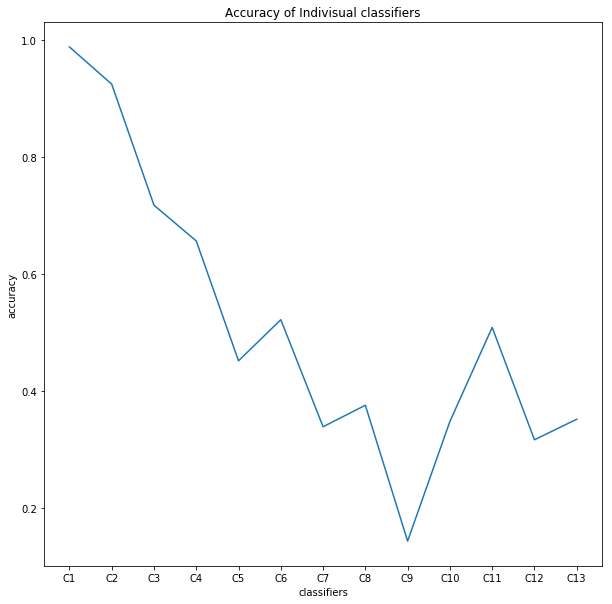

In [229]:

from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
# x axis values 
x = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13'] 
# corresponding y axis values 
y = [0.9875055679287306,0.9239062152407553,0.7174105671349644, 0.6563395729277477, 0.4518574524648987, 0.5220372774000456, 
    0.3393443297056253, 0.37601084332945856, 0.14422376976919316, 0.34832706467988916, 0.508882865676306, 0.31712249396139885,  0.35214340717766573] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('classifiers') 
# naming the y axis 
plt.ylabel('accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy of Indivisual classifiers') 
  
# function to show the plot 
plt.show() 

In [298]:
from sklearn.model_selection import train_test_split
acc_vals = []
for i in range(0, 5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    val = model(X_train, y_train, X_test, y_test)
    #print("model values: ", val)
    acc_vals.append(val)
print(acc_vals)
print("Total Accuracy: ", sum(acc_vals)/len(acc_vals))

length of validation set 1796
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']
C1
no of correct predictions:  1785
Total no of predictions:  1796
accuracy of C1:  99.38752783964365 %
Number of trance songs predicted correctly:  104
Total number of trance songs in validation set:  111
precision of trance:  93.69369369369369 %
Total number of correct predictions so far:  104
Total number of predictions so far:  111
overall accuracy so far:  93.69369369369369 %
-------------------------------------------------------------------------------------
[romantic, country, classical, hiphop, edm, ..., party, rock, jazz, happy, workout]
Length: 13
Categories (13, object): [romantic, country, classical, hiphop, ..., rock, jazz, happy, workout]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 1 ... 0 1 0]
C2
no of correct predictions:  1564
Total no of C2 songs in the dataset:  1685
accuracy of C2:  92.81899109792285 %
len of x_val_c3:  192
len of y_val_c3:  192
len of x_val_c4:  1604
len of y_val_c4:  1604
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  104
Total number of predictions so far:  111
[classical, jazz]
Categories (2, object): [classical, jazz]
class names for C3:  ['classical', 'jazz']
C3
no of correct predictions:  154
Total no of C3 songs in the dataset:  192
accuracy of C3:  80.20833333333334 %
precision of jazz:  73.33333333333333 %
precision of classical:  36.97478991596639 %
Total number of correct predictions so far:  258
Total number of predictions so far:  380
overall accuracy so far:  67.89473684210526 %
-------------

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

C4
no of correct predictions:  1056
Total no of C4 songs in the dataset:  1604
accuracy of C4:  65.83541147132169 %
len of x_val_c5:  677
len of y_val_c5:  677
len of x_val_c6:  927
len of y_val_c6:  927
-------------------------------------------------------------------------------------
[hiphop, edm, oldhits, newhits, workout]
Categories (5, object): [hiphop, edm, oldhits, newhits, workout]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
[1 0 1 ... 1 0 1]
C5
no of correct predictions:  291
Total no of C5 songs in the dataset:  677
accuracy of C5:  42.98375184638109 %
len of x_val_c7:  270
len of y_val_c7:  270
len of x_val_c8:  407
len of y_val_c8:  407
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  258
Total number of predictions so far:  380
[edm, workout]
Categories (2, object): [edm, workout]
class names for C7:  ['edm', 'workout']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

C7
no of correct predictions:  86
Total no of C7 songs:  270
accuracy of C7:  31.851851851851855 %
precision of EDM:  64.12213740458014 %
precision of workout:  2.5316455696202533 %
Total number of correct predictions so far:  344
Total number of predictions so far:  590
overall accuracy so far:  58.30508474576271 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  344
Total number of predictions so far:  590
[hiphop, oldhits, newhits]
Categories (3, object): [hiphop, oldhits, newhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']
C8
no of correct predictions:  153
Total no of C8 songs in the dataset:  407
accuracy of C8:  37.59213759213759 %
no of old hits predicted correctly:  10
Total no of old hits songs in the dataset:  102
precision of oldhits:  9.803921568627452 %
Total number of correct predictions so far:  354
Total number of predictions so far:  692
overall accuracy so far:  51.1560693641

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

C9
no of correct predictions:  26
Total no of C9 songs:  208
accuracy of C9:  12.5 %
precision of newhits:  21.839080459770116 %
precision of hiphop:  5.109489051094891 %
Total number of correct predictions so far:  380
Total number of predictions so far:  916
overall accuracy so far:  41.48471615720524 %
-------------------------------------------------------------------------------------
[romantic, country, sad, party, rock, happy]
Categories (6, object): [romantic, country, sad, party, rock, happy]
class names for C6:  ['country', 'happy', 'party', 'rock', 'romantic', 'sad']
C6
no of correct predictions:  243
Total no of C6 songs in the dataset:  927
accuracy of C6:  26.21359223300971 %
len of x_val_c10:  309
len of y_val_c10:  309
len of x_val_c11:  368
len of y_val_c11:  368
-------------------------------------------------------------------------------------
[country, party, happy]
Categories (3, object): [country, party, happy]
class names for C2:  ['country', 'happy', 'party']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

C12
no of correct predictions:  36
Total no of C12 songs in the dataset:  187
accuracy of C12:  19.25133689839572 %
Total number of correct predictions so far:  435
Total number of predictions so far:  1262
overall accuracy so far:  34.46909667194929 %
-------------------------------------------------------------------------------------
[romantic, sad, rock]
Categories (3, object): [romantic, sad, rock]
class names for C11:  ['rock', 'romantic', 'sad']
C11
no of correct predictions:  132
Total no of C11 songs in the dataset:  368
accuracy of C11:  35.869565217391305 %
no of rock songs predicted correctly:  11
Total rock songs in the dataset:  97
precision of rock songs:  11.34020618556701 %
Total number of correct predictions so far:  446
Total number of predictions so far:  1359
overall accuracy so far:  32.818248712288444 %
len of x_val_c12:  187
len of y_val_c12:  187
-------------------------------------------------------------------------------------


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:710: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:771: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

[romantic, sad]
Categories (2, object): [romantic, sad]
class names for C13:  ['romantic', 'sad']
C13
no of correct predictions:  85
Total no of C13 songs in the dataset:  326
accuracy of C13:  26.07361963190184 %
precision of romantic songs:  21.39917695473251 %
precision of sad songs:  17.010309278350515 %
Total number of correct predictions so far:  531
Total number of predictions so far:  1796
overall accuracy so far:  29.565701559020045 %
-------------------------------------------------------------------------------------
length of validation set 1796
class names for C1:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']
C1
no of correct predictions:  1785
Total no of predictions:  1796
accuracy of C1:  99.38752783964365 %
Number of trance songs predicted correctly:  104
Total number of trance songs in validation set:  111
precision of trance:  93.69369369369369 %
Total number of correct predi

[romantic, country, classical, hiphop, edm, ..., party, rock, jazz, happy, workout]
Length: 13
Categories (13, object): [romantic, country, classical, hiphop, ..., rock, jazz, happy, workout]
class names for C2:  ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 1 ... 0 1 0]
C2
no of correct predictions:  1564
Total no of C2 songs in the dataset:  1685
accuracy of C2:  92.81899109792285 %
len of x_val_c3:  192
len of y_val_c3:  192
len of x_val_c4:  1604
len of y_val_c4:  1604
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  104
Total number of predictions so far:  111
[classical, jazz]
Categories (2, object): [classical, jazz]
class names for C3:  ['classical', 'jazz']
C3
no of correct predictions:  154
Total no of C3 songs in the dataset:  192
accuracy of C3:  80.20833333333334 %
precision of jazz:  73.33333333333333 %
pr

C4
no of correct predictions:  1056
Total no of C4 songs in the dataset:  1604
accuracy of C4:  65.83541147132169 %
len of x_val_c5:  677
len of y_val_c5:  677
len of x_val_c6:  927
len of y_val_c6:  927
-------------------------------------------------------------------------------------
[hiphop, edm, oldhits, newhits, workout]
Categories (5, object): [hiphop, edm, oldhits, newhits, workout]
class names for C5:  ['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
[1 0 1 ... 1 0 1]
C5
no of correct predictions:  291
Total no of C5 songs in the dataset:  677
accuracy of C5:  42.98375184638109 %
len of x_val_c7:  270
len of y_val_c7:  270
len of x_val_c8:  407
len of y_val_c8:  407
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  258
Total number of predictions so far:  380
[edm, workout]
Categories (2, object): [edm, workout]
class names for C7:  ['edm', 'workout']
C7
no of correct predictions:  86
Total no

C7
no of correct predictions:  86
Total no of C7 songs:  270
accuracy of C7:  31.851851851851855 %
precision of EDM:  64.12213740458014 %
precision of workout:  2.5316455696202533 %
Total number of correct predictions so far:  344
Total number of predictions so far:  590
overall accuracy so far:  58.30508474576271 %
-------------------------------------------------------------------------------------
Total number of correct predictions so far:  344
Total number of predictions so far:  590
[hiphop, oldhits, newhits]
Categories (3, object): [hiphop, oldhits, newhits]
class names for C8:  ['hiphop', 'newhits', 'oldhits']
C8
no of correct predictions:  153
Total no of C8 songs in the dataset:  407
accuracy of C8:  37.59213759213759 %
no of old hits predicted correctly:  10
Total no of old hits songs in the dataset:  102
precision of oldhits:  9.803921568627452 %
Total number of correct predictions so far:  354
Total number of predictions so far:  692
overall accuracy so far:  51.1560693641